In [ ]:
# default_exp gbe.ema_drinking

# EMA drinking

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)

In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.ist.data_provider import ISTDataProvider
from trr265.gbe.wm.data_provider import WMDataProvider
from trr265.gbe.sst.data_provider import SSTDataProvider
from trr265.gbe.rtt.data_provider import RTTDataProvider

import trr265.gbe.ist.scoring as ist_scoring 
import trr265.gbe.wm.scoring as wm_scoring 
import trr265.gbe.sst.scoring as sst_scoring 
import trr265.gbe.rtt.scoring as rtt_scoring 

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

### Information sampling task

In [ ]:
# Getting raw data
dp = ISTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_ist_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and (is_baseline==False)")
ist = ist_scoring.get_oversampling_predicted_joint(df)[0]
ist = ist.merge(dp.get_gbe_data(columns = ['participant','session_number']), left_on = 'gbe_index', right_index = True, how = 'left')
#ist = ist.groupby('participant').mean()
ist = ist.rename(columns = {"oversampling_predicted_joint":"ist_oversampling"})

R[write to console]: Lade nötiges Paket: lme4

R[write to console]: Lade nötiges Paket: Matrix

R[write to console]: 
Attache Paket: ‘lmerTest’


R[write to console]: Das folgende Objekt ist maskiert ‘package:lme4’:

    lmer


R[write to console]: Das folgende Objekt ist maskiert ‘package:stats’:

    step




### Working memory task

In [ ]:
# Getting raw data
dp = WMDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_wm_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and (is_baseline==False)")
# Filtering participants with old app
df = dp.filter_old_app_sessions(df)
df = dp.filter_level_two_failures(df)
wm = wm_scoring.get_perc_correct_predicted_sep_trial(df)[0]
wm = wm.merge(dp.get_gbe_data(columns = ['participant','session_number']), left_on = 'gbe_index', right_index = True, how = 'left')
wm = wm.rename(columns={'perc_predicted_sep_trial_no_distractor_1': 'wm_no_1',
                       'perc_predicted_sep_trial_no_distractor_2': 'wm_no_2',
                       'perc_predicted_sep_trial_encoding_distractor': 'wm_encoding',
                       'perc_predicted_sep_trial_delayed_distractor':'wm_delayed'})

5 participants used an old version of the task in some of their sessions.  19 sessions (0.82%) were removed from the dataset.
28 sessions (1.22%) were removed because participants failed a level two trial.


### Risk taking task

In [ ]:
# Getting raw data
dp = RTTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_rtt_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and (is_baseline==False)")
rtt = rtt_scoring.get_perc_gamble_predicted_joint(df)[0]
rtt = rtt.merge(dp.get_gbe_data(columns = ['participant','session_number']), left_on = 'gbe_index', right_index = True, how = 'left')
rtt = rtt.rename(columns={'perc_gamble_joint_win': 'rtt_win',
                       'perc_gamble_joint_loss': 'rtt_loss',
                       'perc_gamble_joint_mixed': 'rtt_mixed'})

### Stop signal task

In [ ]:
# Getting raw data
dp = SSTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_sst_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and (is_baseline==False)")
sst = sst_scoring.get_ssrt_predicted_joint(df)[0]
sst = sst.merge(dp.get_gbe_data(columns = ['participant','session_number']), left_on = 'gbe_index', right_index = True, how = 'left')
sst = sst.rename(columns = {'ssrt_predicted_joint':'ssrt'})

In [ ]:
sst.to_csv('../data/processed/sst_predicted_joint_longitudinal.csv')
wm.to_csv('../data/processed/wm_predicted_joint_longitudinal.csv')
rtt.to_csv('../data/processed/rtt_predicted_joint_longitudinal.csv')
ist.to_csv('../data/processed/ist_predicted_joint_longitudinal.csv')

### Drinking

In [ ]:
initial_participants = dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']).query("is_initial").participant.unique()
len(initial_participants)

300

### AUD criteria

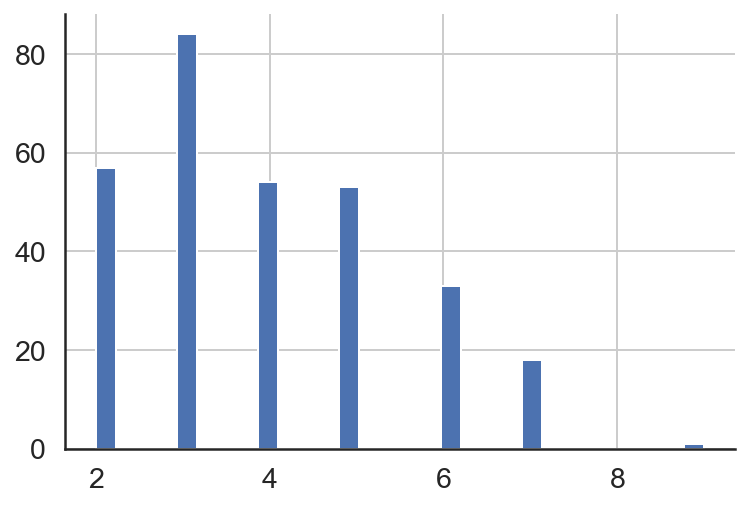

In [ ]:
ba = dp.get_ba_data(columns = ['redcap_event_name','mov_id','bx_aud_sum']).query("redcap_event_name=='erhebungszeitpunkt_arm_1'")
ba = ba[ba.mov_id.isin(initial_participants)]
aud = ba[~ba.bx_aud_sum.isnull()][['mov_id','bx_aud_sum']]
aud.columns = ['participant','aud']
aud = aud.groupby('participant').first()
aud.aud.hist(bins = 30)
sns.despine()

### Drinking days
16 participants did not report to drink any alcohol during the first EMA month.

In [ ]:
two_day = dp.get_two_day_data()
#drinking_days = two_day.query("sampling_day<30")#.groupby('participant').g_alc.agg(['mean','median'])
#drinking_days['drinking_days'] = ema_drinking.g_alc>0
#drinking_days = drinking_days.groupby('participant')[['g_alc','drinking_days']].sum().reset_index()
#drinking_days = drinking_days[drinking_days.participant.isin(initial_participants)].set_index('participant')

In [ ]:
tasks = pd.concat([wm, sst, rtt,ist],axis = 1).dropna()
tasks = tasks.loc[:,~tasks.columns.duplicated()]

In [ ]:
df = tasks.merge(dp.get_gbe_data(columns = ['trigger_date','time_since_last_gbe','ema_session']), on = 'gbe_index', how = 'left')

<AxesSubplot:>

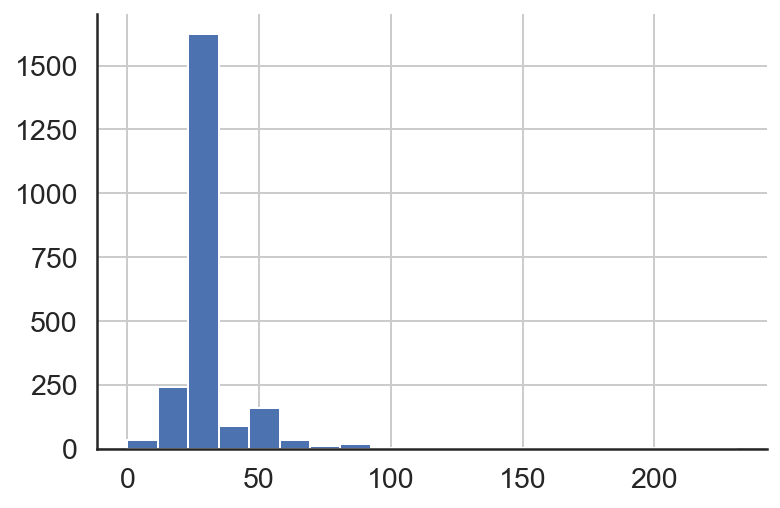

In [ ]:
df.time_since_last_gbe.hist(bins = 20)

> The distance between sessions is mostly 28 days. Some distances are longer (probably due to skipped sessions). Very few are, however also mach shorter.

In [ ]:
df['time_to_next_gbe'] = df.time_since_last_gbe.shift(-1)
# Send maximum to 28 days
df['time_to_next_gbe'][df['time_to_next_gbe'] >= 28] = 28
df.time_to_next_gbe.fillna(28,inplace = True)

> Here we use the distance to the next session or a maximum of 28 days as the window in which we will aggregate drinking data.

> ToDo: This function should be generalized to allow for other windows for exploratory analyses.

In [ ]:
df['end_date'] = df.trigger_date + pd.to_timedelta(df.time_to_next_gbe, unit = 'd')

In [ ]:
two_day['gbe_index'] = None
# Not pretty but it should work
for s in df[['trigger_date','end_date','participant']].reset_index().iterrows():
    gbe_index = s[1].loc['gbe_index']
    starting_date = s[1].loc['trigger_date']
    end_date = s[1].loc['end_date']
    participant = s[1].loc['participant']
    selection = two_day.query('(participant==@participant) and (date<@end_date) and (date >= @starting_date)').index
    two_day.loc[selection, 'gbe_index'] = gbe_index
    
print(end_date)

2021-08-30 15:47:07


In [ ]:
import numpy as np
two_day['drinking_days'] = two_day.g_alc>0
two_day['limit'] = two_day['limit']-1
drinking = two_day.groupby('gbe_index').agg({'g_alc':[np.mean, np.median, np.sum],'drinking_days':np.sum,'limit':[np.median], 'control':np.mean})
drinking.columns = ['_'.join(col).strip() for col in drinking.columns.values]
drinking.loc[drinking.g_alc_mean.isnull(), 'drinking_days_sum'] = np.nan
drinking['g_alc_per_drinking_day'] = drinking['g_alc_sum']/drinking['drinking_days_sum']
drinking = drinking[['g_alc_mean','g_alc_median','g_alc_per_drinking_day','limit_median','control_mean']]

## Task score correlations

In [ ]:
cor = pd.concat([drinking, tasks], axis = 1).dropna()
import biuR

def pearson_r(x, y, df):
    return scipy.stats.pearsonr(df[x], df[y])
    

#export
def lmer(x, y, df):    
    R = biuR.wrapper.R()
    p = R("""
    library(lmerTest)
    library(ggeffects)
    # Running the model
    control=lmerControl(optimizer = "bobyqa", optCtrl=list(maxfun=1e6))
    m = lmer(%(y)s ~ %(x)s + (1 | participant), data=df, na.action = na.exclude) 
    estimate = summary(m)$coefficients[2]
    p_value = summary(m)$coefficients[10]
    """%{'x':x,'y':y},push=dict(df=df))
    
    
    m = R("""m""")
    estimate = R("""estimate""")
    p_value = R("""p_value""")

    return estimate[0], p_value[0]

lmer('wm_no_1','g_alc_mean',cor)

(-4.92284316839769, 0.28383855540546304)

In [ ]:
import scipy

def correl(df, corr_func = pearson_r):
    df_corr = pd.DataFrame() # Correlation matrix
    
    df_p = pd.DataFrame()  # Matrix of p-values
    for x in df.drop(columns='participant').columns:
        for y in df.drop(columns='participant').columns:
            try:
                if x==y:
                    corr = (1,0)
                corr = corr_func(x, y, df)
                df_corr.loc[x,y] = corr[0]
                df_p.loc[x,y] = corr[1]
            except:
                df_corr.loc[x,y] = np.nan
                df_p.loc[x,y] = np.nan

    return df_corr, df_p

def correlation_matrix(analysis_data, alpha = .05, bonferroni = False, size = (11,9), show_correl = True, corr_func = pearson_r):
    print(len(analysis_data))

    if bonferroni:
        variables = len(analysis_data.columns)
        correction = ((variables * variables) - variables)/2
        alpha = alpha / correction

    df_corr, df_p = correl(analysis_data, corr_func = corr_func)
    
    #sig = (df_p < alpha).replace({True:"*",False:""})
    
    sig = df_p
    sig.where(sig>=.001).fillna(2)
    sig = sig.where(sig>=.01).fillna(3)
    sig = sig.where(sig>.05).fillna(4)
    sig = sig.where(sig>1).fillna(5)
    sig = sig.replace({2:"***"})
    sig = sig.replace({3:"**"})
    sig = sig.replace({4:"*"})
    sig = sig.replace({5:""})

    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(df_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size)
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    df_corr_label = df_corr.applymap(lambda x: ('%.2f'%x).replace('0.','.'))
    try:
        df_corr_label = df_corr_label + sig
    except:
        df_corr_label = "err"
    if show_correl:
        p1 = sns.heatmap(df_corr, mask=mask,cmap=cmap, center=0, vmax=1, vmin=-1,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5},
                   annot=df_corr_label,fmt = '')
    else:
         p1 = sns.heatmap(df_corr, mask=mask,cmap=cmap, center=0, vmax=1, vmin=-1,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt = '')       
    #p1.text(len(df_corr)-1, 1, "Alpha = %g"%alpha, size='medium', color='black')
    p = df_p.unstack()
    p.index = ['*'.join(map(str,i)) for i in p.index.tolist()]
    p = p.to_dict()
    corr = df_corr.unstack()
    corr.index = ['*'.join(map(str,i)) for i in corr.index.tolist()]
    corr = corr.to_dict()
    

In [ ]:
labels = {
    "wm_no_1":"no distractor (long)",
    "wm_no_2":"no distractor (short)",
    "wm_encoding":"encoding distractor",
    "wm_delayed":"delayed distractor",
    "rtt_win":"% gambles (win)",
    "rtt_loss":"% gambles (loss)",
    "rtt_mixed":"% gambles (mixed)",
    "ist_oversampling":"oversampling",
    "last_three_month":"Drinks per day",
    "g_alc_per_day_last_three_month":"g/alc per day",
    "g_alc_per_drinking_day_last_three_month":"g/alc per drinking day",
    "drinking_days_last_three_month":"Drinking days",
    "aud":"AUD criteria",
    "g_alc_mean":"Mean consumption",
    "g_alc_median":"Median consumption",
    "drinking_days":" Drinking days",
    "g_alc_per_drinking_day":" g/alc per drinking day"
}

next step: change window of drikning and beetter nan handling

### Based on mixed models
e.g., `g_alc_mean ~ ssrt + (1|participant)`

In [ ]:
from trr265.stats import decompose_within_between

1363


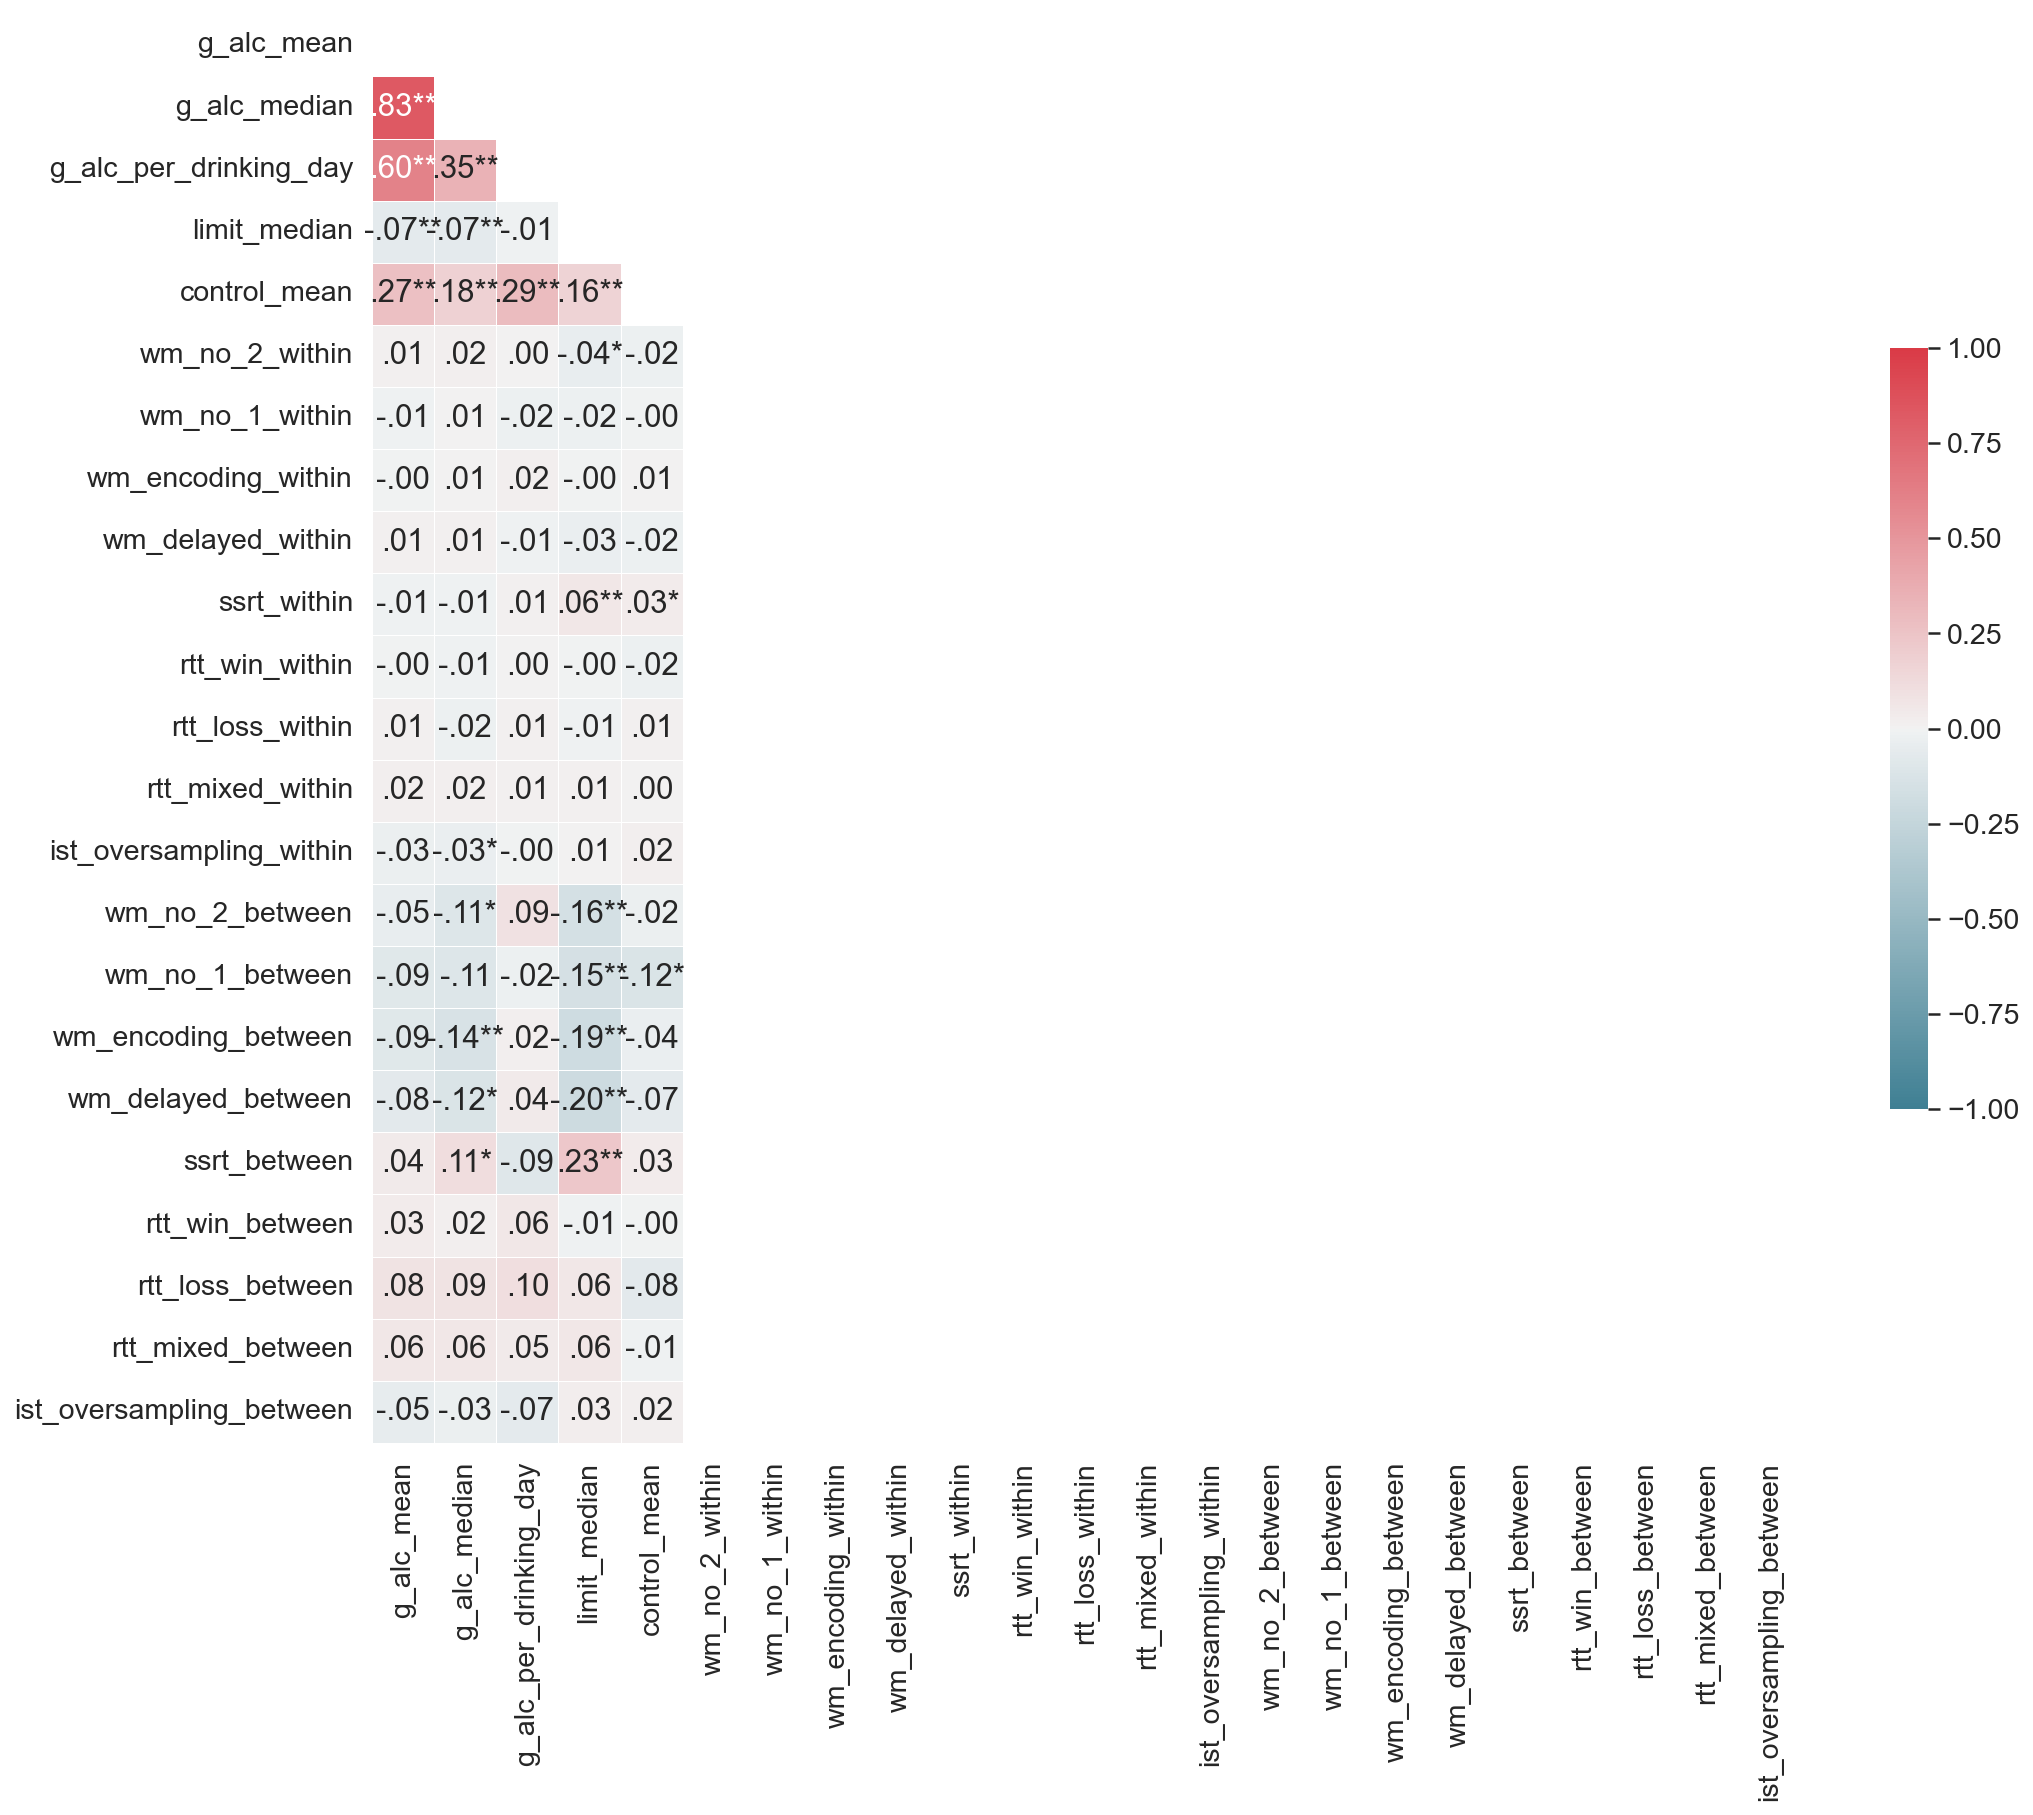

In [ ]:
cor = pd.concat([drinking, tasks], axis = 1).dropna()
columns = list(tasks.drop(columns = ['participant','session_number']))
cor = decompose_within_between(cor,columns = columns)
cor2 = cor.set_index('participant')
cor2 = (cor2-cor2.mean())/cor2.std()
correlation_matrix(cor2.drop(columns=['session_number']).reset_index(), corr_func = lmer_within_between, size = (16, 14))

#### Oversampling and consumption

In [ ]:
cor = pd.concat([drinking, tasks], axis = 1).dropna()
columns = list(tasks.drop(columns = ['participant','session_number']))
cor2_d = decompose_within_between(cor,columns = columns)
#cor2_d = cor.set_index('participant')
#cor2 = (cor2-cor2.mean())/cor2.std()

In [ ]:
lmer_within_between('ist_oversampling_within', 'g_alc_median',cor2.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ ist_oversampling_within + ist_oversampling_between +  
    (1 | participant)
   Data: df

REML criterion at convergence: 2888.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2852 -0.3910 -0.0840  0.4057  8.6131 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.7146   0.8454  
 Residual                0.3073   0.5544  
Number of obs: 1363, groups:  participant, 257

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)  
(Intercept)                -0.03571    0.05601  251.01072  -0.638   0.5243  
ist_oversampling_within    -0.03481    0.01502 1105.28259  -2.317   0.0207 *
ist_oversampling_between   -0.02547    0.05708  247.63079  -0.446   0.6558  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
               (Intr) ist_vrsmplng_w
ist_vrsm

(-0.03481251518453625, 0.020659262643408945)

<AxesSubplot:xlabel='ist_oversampling_within', ylabel='g_alc_median'>

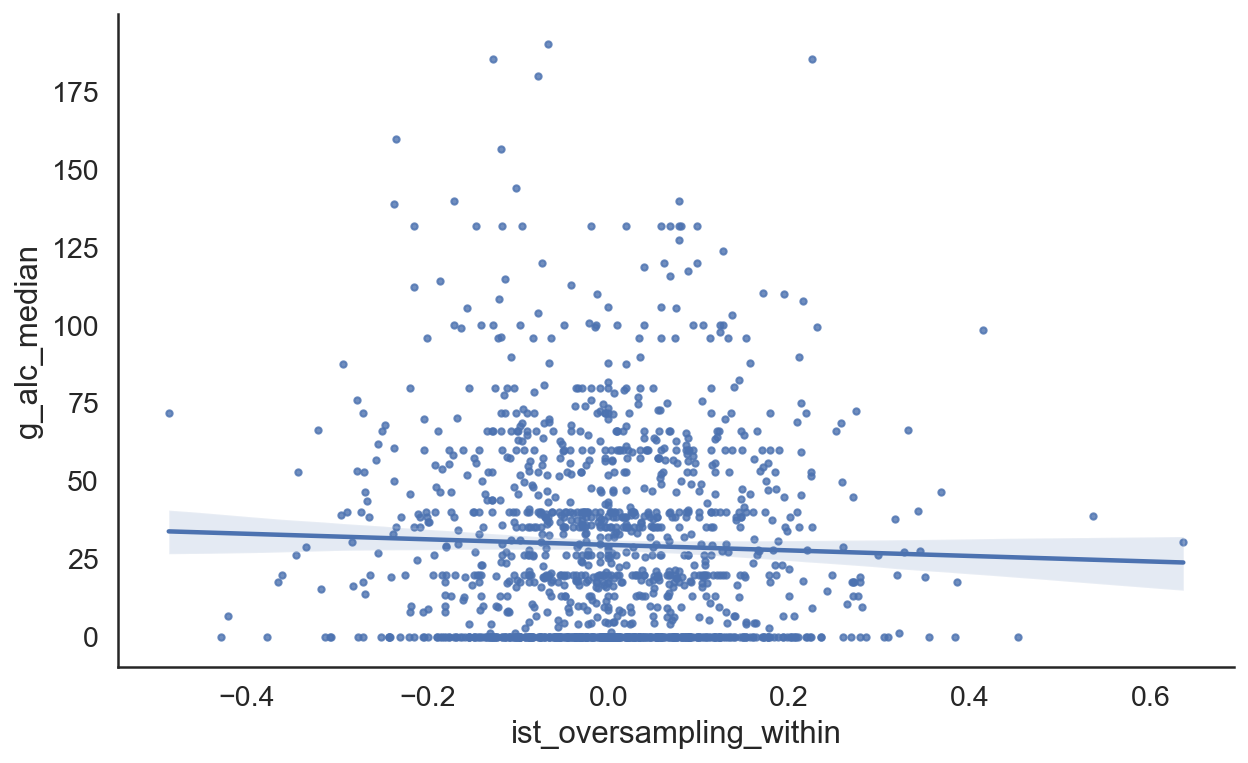

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'ist_oversampling_within', y = 'g_alc_median', data = cor2_d,scatter_kws={'s':10})

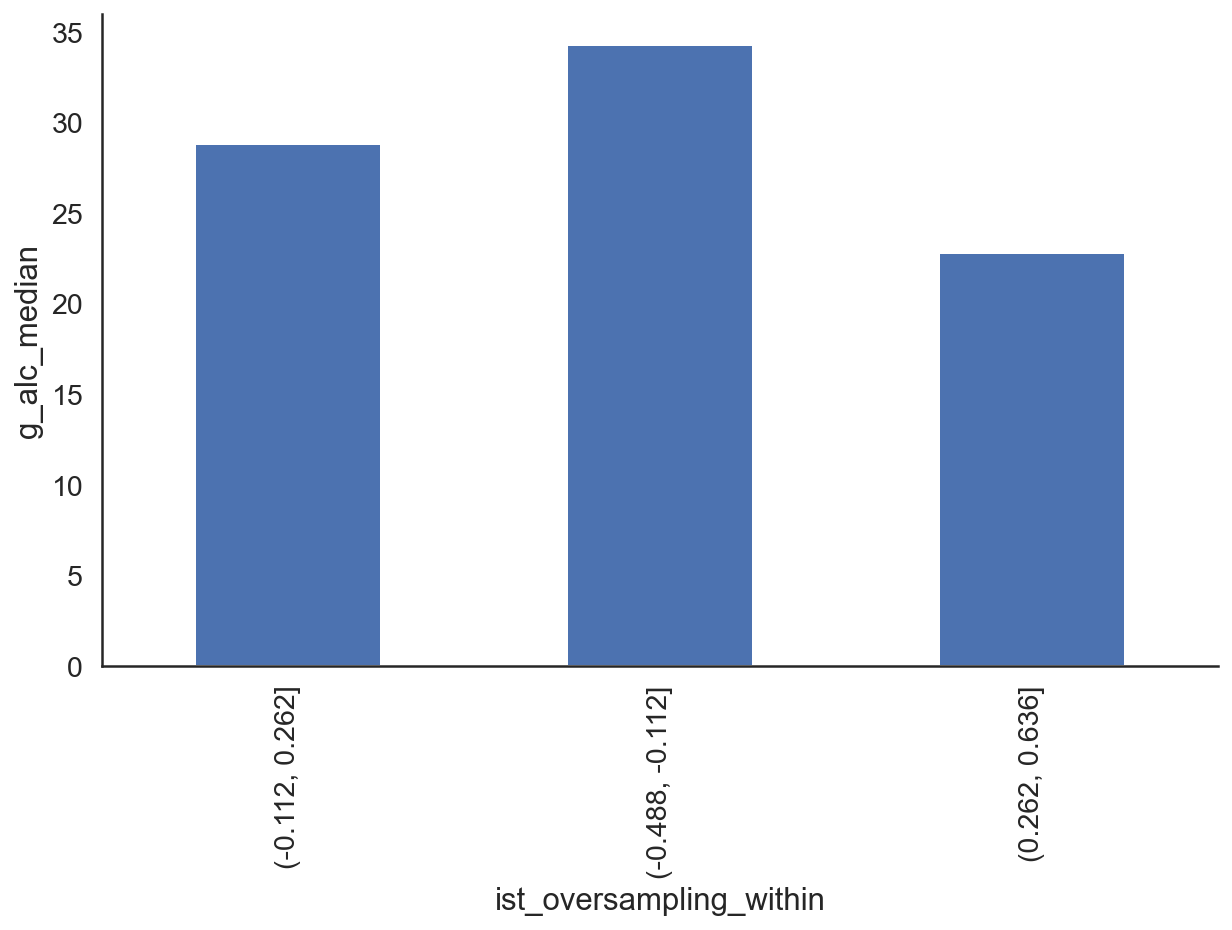

In [ ]:
def binned_plot(x,y,df,bins):
    df['x_binned'] = pd.cut(df[x], 3)
    df = df.sort_values('x_binned')
    df['x_binned'] = df.x_binned.astype(str)
    _df = df.groupby('x_binned')[y].agg([np.mean, np.std]).reset_index()
    ax = _df.plot.bar(x = 'x_binned', y = 'mean',figsize=(10,6), legend = False, sort_columns = False)
    #plt.bar(x)
    #plt.errorbar(df['x_binned'].astype(str), df[y], yerr = _df['std'],fmt='o',ecolor = 'red',color='yellow')
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    
binned_plot('ist_oversampling_within', 'g_alc_median', cor2_d, 3)

NameError: name 'x' is not defined

<Figure size 720x432 with 0 Axes>

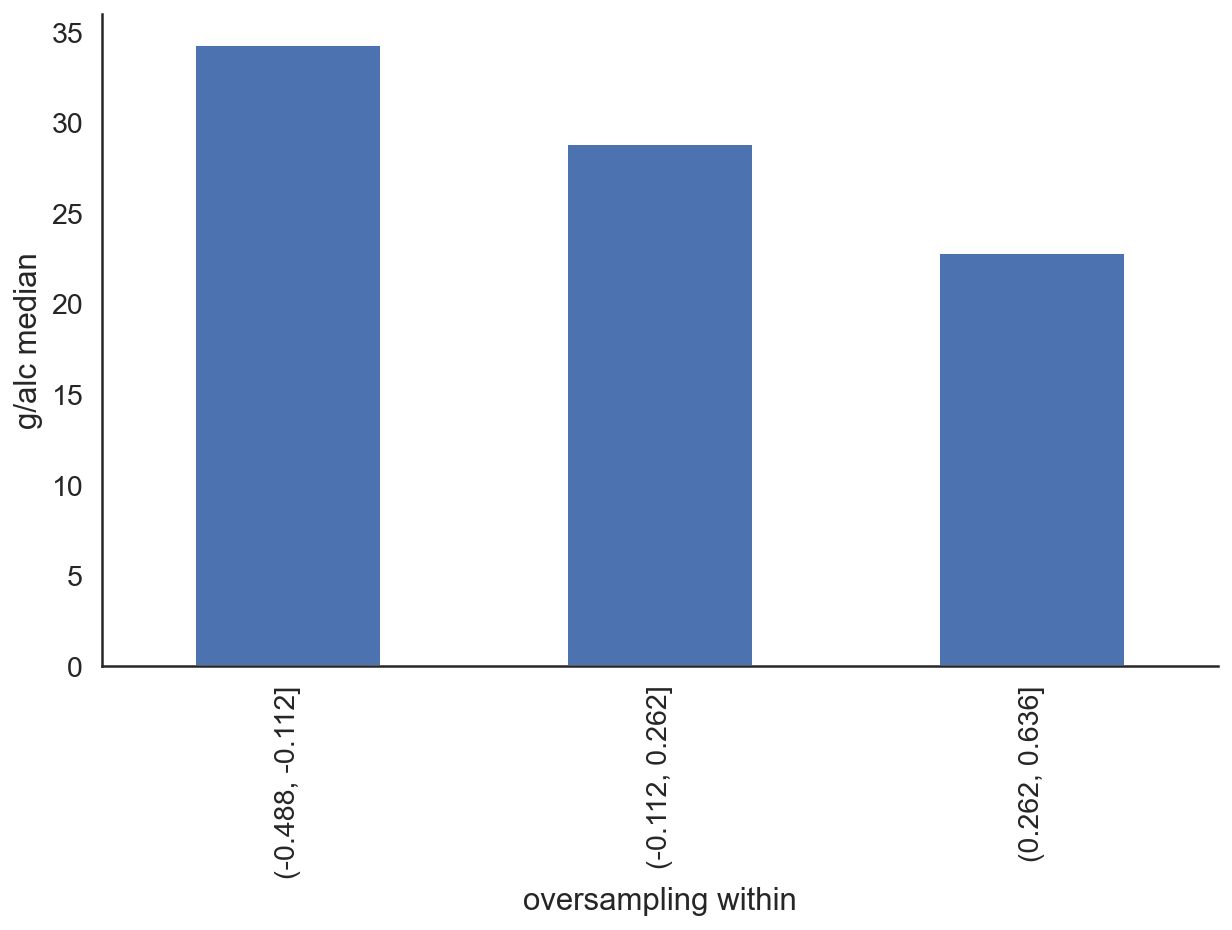

In [ ]:
plt.figure(figsize=(10,6))
cor2_d['limit_binned'] = pd.cut(cor2_d.ist_oversampling_within, 3)
ax = cor2_d.groupby('limit_binned').g_alc_median.agg([np.mean, np.std]).reset_index().plot.bar(x = 'limit_binned', y = 'mean',figsize=(10,6), legend = False)
ax.set_ylabel('g/alc median')
ax.set_xlabel('oversampling within')
plt.errorbar(x, y, yerr = y_error,fmt='o',ecolor = 'red',color='yellow')

#### WM no encoding (fast) and consumption

In [ ]:
lmer_within_between('wm_no_2_within', 'g_alc_median',cor2.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ wm_no_2_within + wm_no_2_between + (1 | participant)
   Data: df

REML criterion at convergence: 2888.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2633 -0.4058 -0.0866  0.4168  8.5928 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.7034   0.8387  
 Residual                0.3084   0.5553  
Number of obs: 1363, groups:  participant, 257

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)  
(Intercept)       -0.03796    0.05564  251.43091  -0.682   0.4956  
wm_no_2_within     0.01793    0.01505 1105.75887   1.192   0.2337  
wm_no_2_between   -0.10823    0.05470  251.21022  -1.979   0.0489 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) wm_n_2_w
wm_n_2_wthn 0.000          
wm_n_2_btwn 0.021  0.000   


(0.01792944874025236, 0.23368896869505404)

<AxesSubplot:xlabel='wm_no_2_between', ylabel='g_alc_median'>

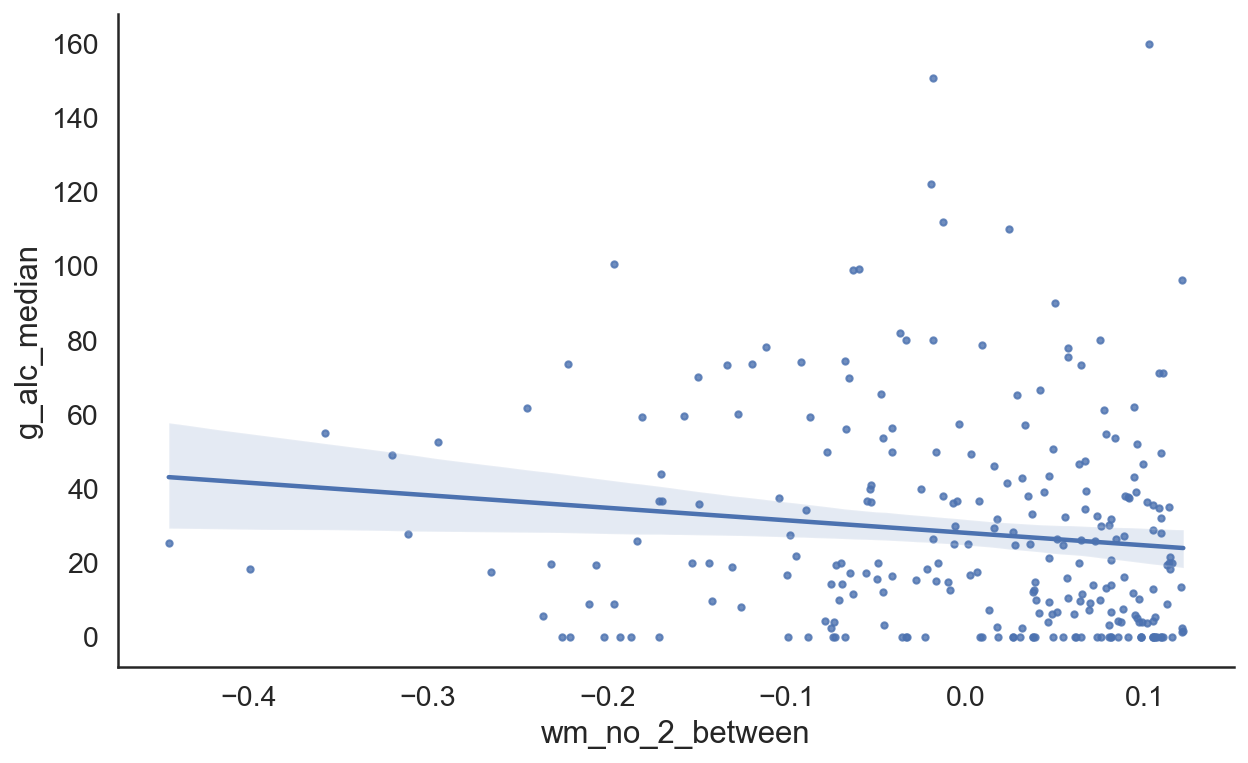

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'wm_no_2_between', y = 'g_alc_median', data = cor2_d.groupby('participant').mean(),scatter_kws={'s':10})

#### WM encoding and consumption

In [ ]:
lmer_within_between('wm_encoding_within', 'g_alc_median',cor2.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ wm_encoding_within + wm_encoding_between + (1 |  
    participant)
   Data: df

REML criterion at convergence: 2886.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2045 -0.4053 -0.0843  0.4120  8.5982 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6946   0.8334  
 Residual                0.3087   0.5556  
Number of obs: 1363, groups:  participant, 257

Fixed effects:
                      Estimate Std. Error         df t value Pr(>|t|)   
(Intercept)         -4.073e-02  5.535e-02  2.516e+02  -0.736   0.4625   
wm_encoding_within   6.432e-03  1.506e-02  1.106e+03   0.427   0.6693   
wm_encoding_between -1.371e-01  5.224e-02  2.577e+02  -2.624   0.0092 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) wm_ncdng_w
wm_ncdng_wt 0.000            
wm_ncdng_bt

(0.006432061922212704, 0.6692856790856505)

<AxesSubplot:xlabel='wm_encoding_between', ylabel='g_alc_median'>

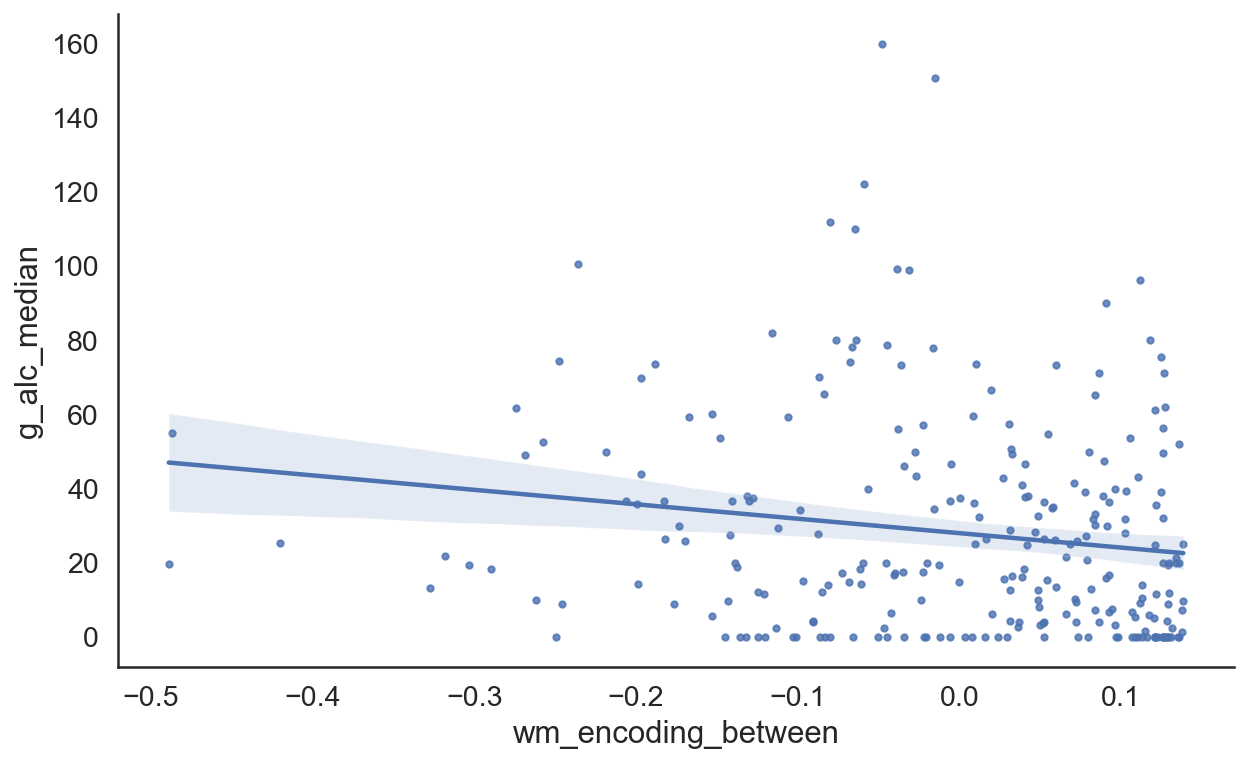

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'wm_encoding_between', y = 'g_alc_median', data = cor2_d.groupby('participant').mean(),scatter_kws={'s':10})

#### WM delayed encoding and consumption

In [ ]:
lmer_within_between('wm_delayed_within', 'g_alc_median',cor2.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ wm_delayed_within + wm_delayed_between + (1 |  
    participant)
   Data: df

REML criterion at convergence: 2888.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2499 -0.4051 -0.0864  0.4118  8.6261 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6993   0.8362  
 Residual                0.3087   0.5556  
Number of obs: 1363, groups:  participant, 257

Fixed effects:
                     Estimate Std. Error         df t value Pr(>|t|)  
(Intercept)          -0.03697    0.05548  250.84585  -0.666   0.5058  
wm_delayed_within     0.01008    0.01506 1105.22555   0.669   0.5034  
wm_delayed_between   -0.12300    0.05552  247.00113  -2.216   0.0276 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) wm_dlyd_w
wm_dlyd_wth 0.000           
wm_dlyd_btw 0.011  0.00

(0.010077249655615858, 0.5034260319033075)

<AxesSubplot:xlabel='wm_delayed_between', ylabel='g_alc_median'>

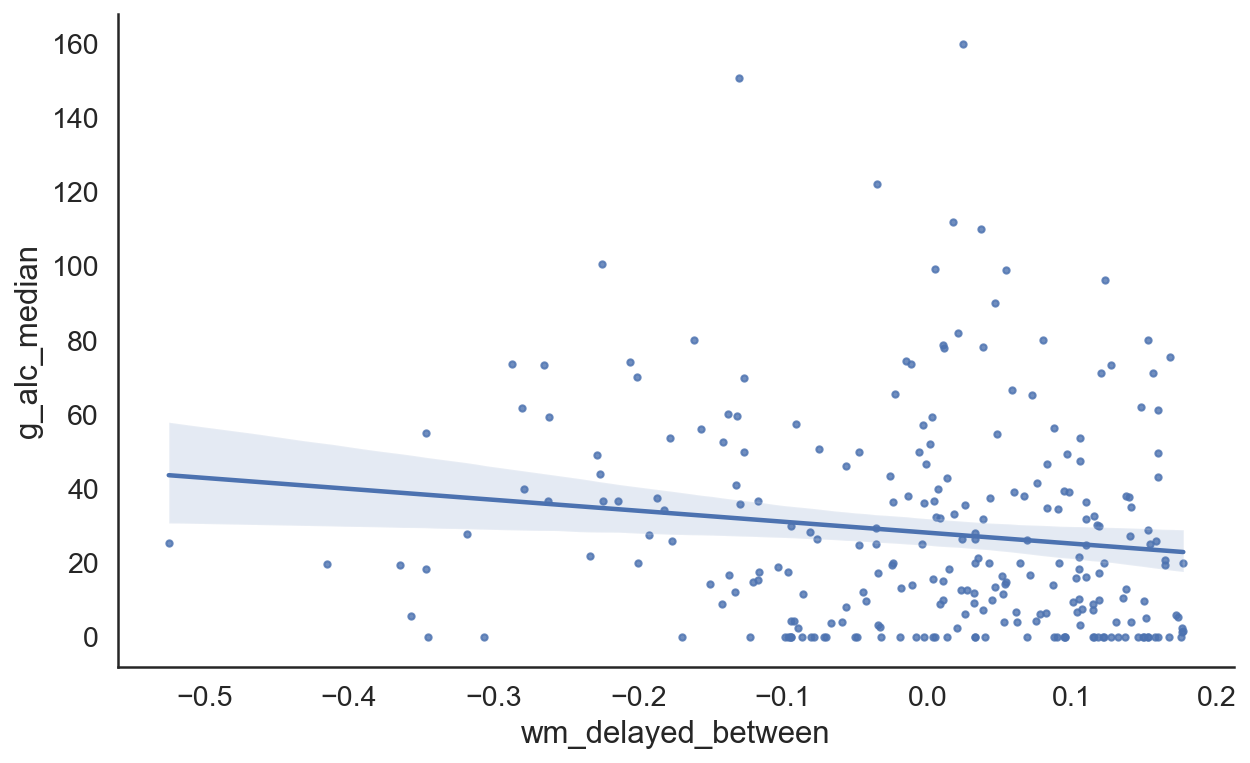

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'wm_delayed_between', y = 'g_alc_median', data = cor2_d.groupby('participant').mean(),scatter_kws={'s':10})

#### SSRT and consumption

In [ ]:
lmer_within_between('ssrt_within', 'g_alc_median',cor2.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ ssrt_within + ssrt_between + (1 | participant)
   Data: df

REML criterion at convergence: 2888.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2549 -0.4101 -0.0859  0.4023  8.5929 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6982   0.8356  
 Residual                0.3089   0.5558  
Number of obs: 1363, groups:  participant, 257

Fixed effects:
               Estimate Std. Error         df t value Pr(>|t|)  
(Intercept)    -0.04032    0.05549  249.22965  -0.727   0.4681  
ssrt_within    -0.01179    0.01506 1103.83624  -0.783   0.4339  
ssrt_between    0.10944    0.05133  268.04208   2.132   0.0339 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) ssrt_w
ssrt_within  0.000       
ssrt_betwen -0.039  0.000


(-0.011788066879642256, 0.4339311800046478)

<AxesSubplot:xlabel='ssrt_between', ylabel='g_alc_median'>

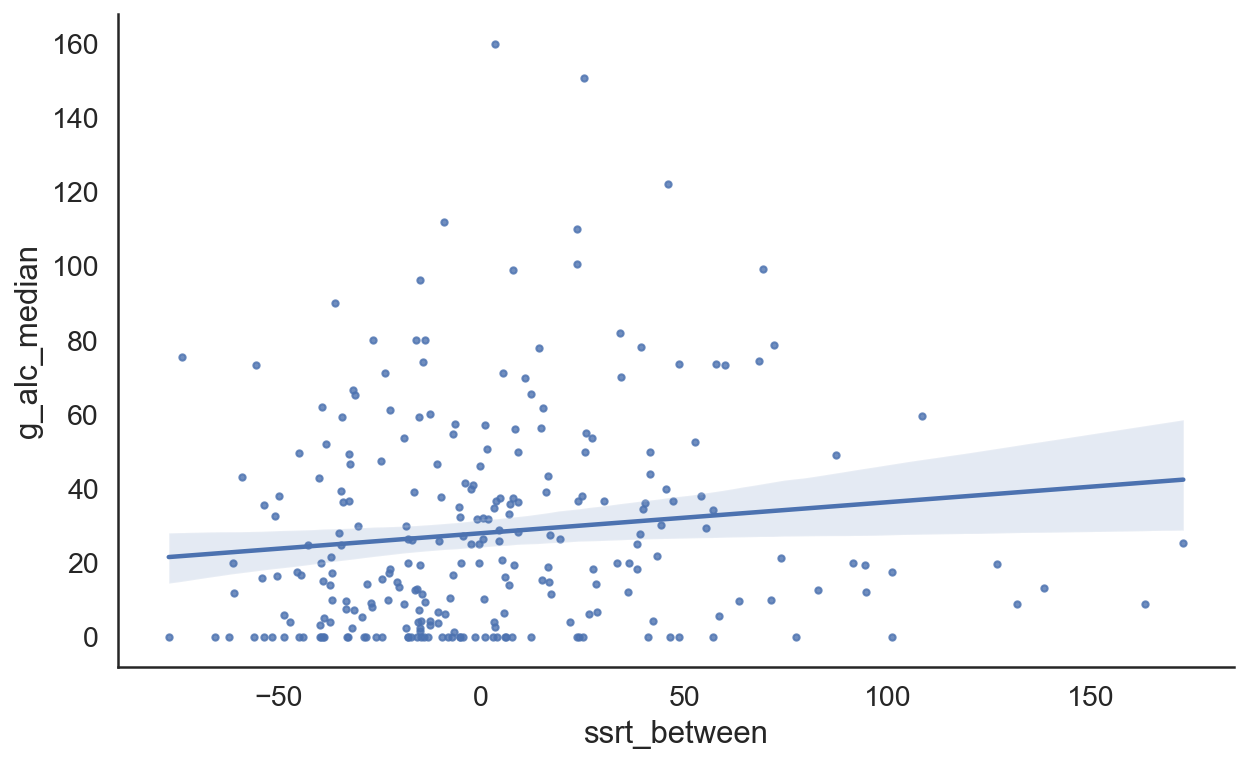

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'ssrt_between', y = 'g_alc_median', data = cor2_d.groupby('participant').mean(),scatter_kws={'s':10})

#### SSRT and loss of control

In [ ]:
lmer_within_between('ssrt_within', 'control_mean',cor2.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: control_mean ~ ssrt_within + ssrt_between + (1 | participant)
   Data: df

REML criterion at convergence: 2855.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0955 -0.4335 -0.1169  0.4053  5.0280 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.7121   0.8439  
 Residual                0.2988   0.5466  
Number of obs: 1363, groups:  participant, 257

Fixed effects:
              Estimate Std. Error        df t value Pr(>|t|)  
(Intercept)  5.541e-02  5.588e-02 2.506e+02   0.992   0.3223  
ssrt_within  3.344e-02  1.481e-02 1.105e+03   2.258   0.0242 *
ssrt_between 3.251e-02  5.165e-02 2.688e+02   0.629   0.5297  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) ssrt_w
ssrt_within  0.000       
ssrt_betwen -0.040  0.000


(0.033438168080379554, 0.024156324681365453)

<AxesSubplot:xlabel='ssrt_within', ylabel='control_mean'>

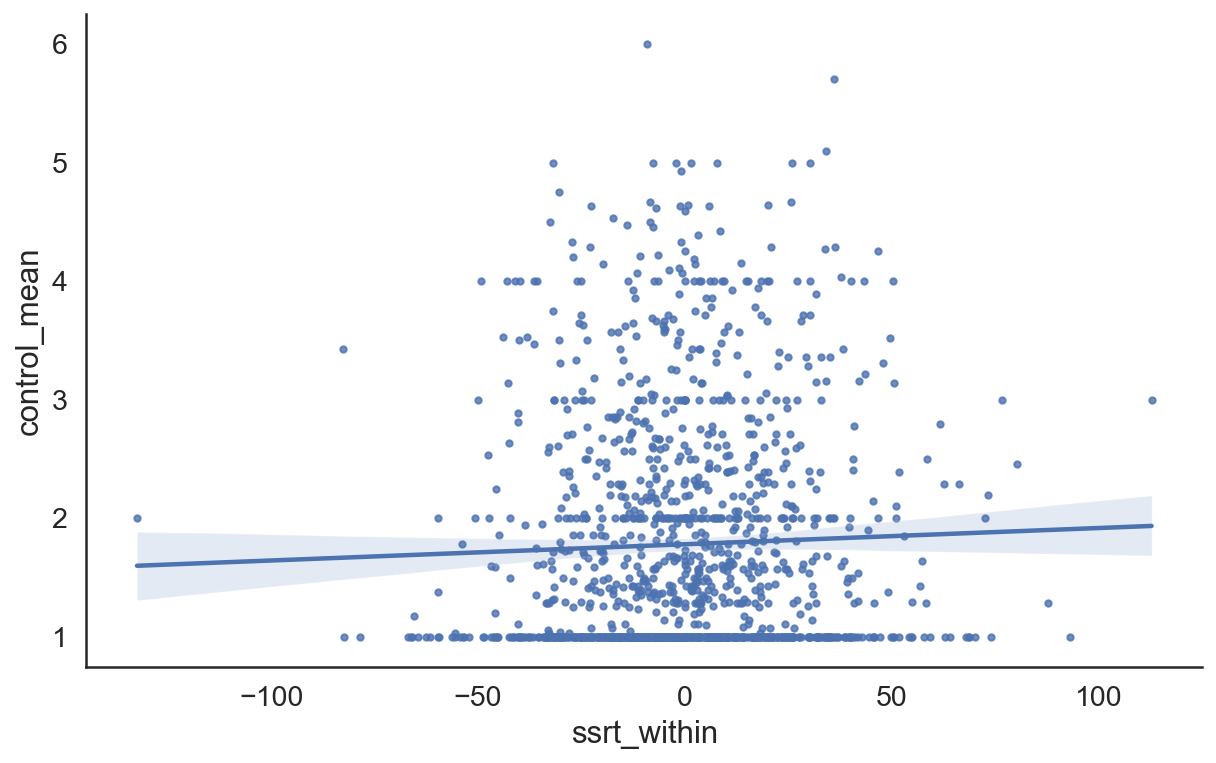

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'ssrt_within', y = 'control_mean', data = cor2_d,scatter_kws={'s':10})

Text(0.5, 0, 'SSRT within')

<Figure size 720x432 with 0 Axes>

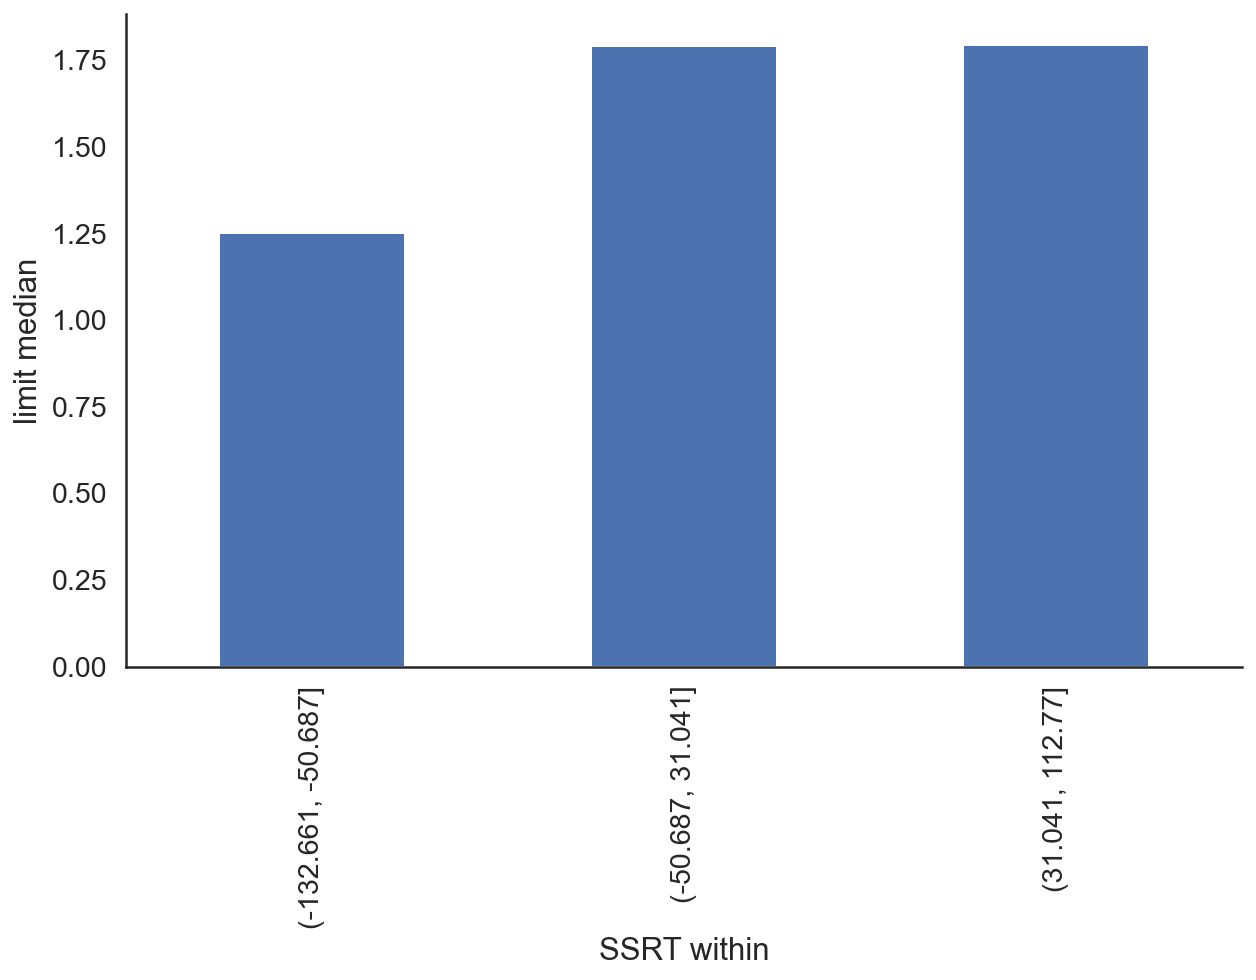

In [ ]:
plt.figure(figsize=(10,6))
cor2_d['limit_binned'] = pd.cut(cor2_d.ssrt_within, 3)
ax = cor2_d.groupby('limit_binned').control_mean.agg([np.mean, np.std]).reset_index().plot.bar(x = 'limit_binned', y = 'mean',figsize=(10,6), legend = False)
ax.set_ylabel('limit median')
ax.set_xlabel('SSRT within')


In [ ]:
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna()
cor3 = cor2.set_index('participant')
columns = ['limit_mean','limit_median','control_mean','Factor_1','Factor_2','Factor_3']
cor4 = decompose_within_between(cor3.reset_index(),columns = columns)

1363


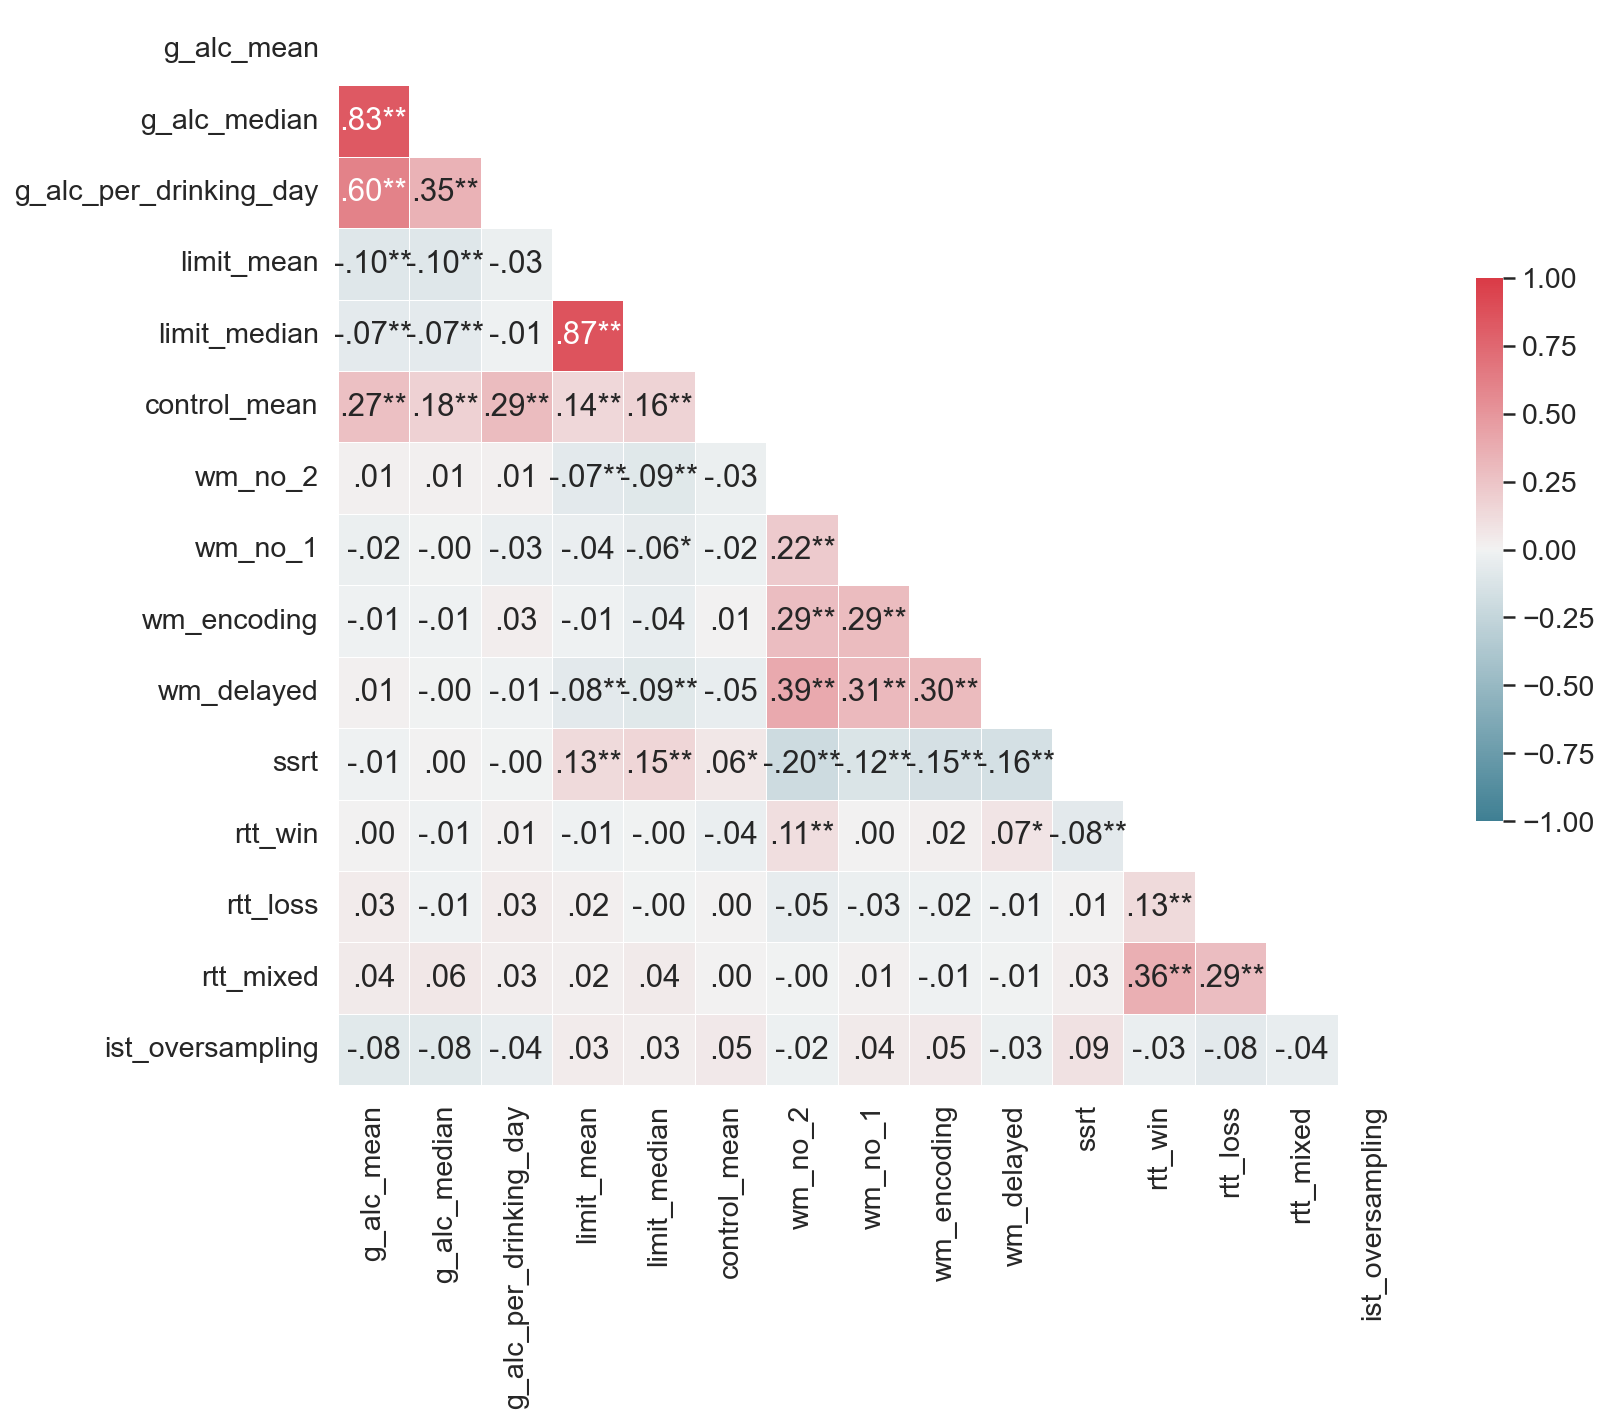

In [ ]:
cor = pd.concat([drinking, tasks], axis = 1).dropna()
cor2 = cor.set_index('participant')
cor2 = (cor2-cor2.mean())/cor2.std()
correlation_matrix(cor2.reset_index().drop(columns = ['session_number']), corr_func = lmer, size = (12, 10))

In [ ]:
cor.limit_median.value_counts()

1.0    658
2.0    366
3.0    326
2.5      8
1.5      5
Name: limit_median, dtype: int64

#### Intention and drinking

In [ ]:
%%R -i cor
require(lmer)
m <- lmer(wm_no_2 ~ as.factor(limit_median) + (1|participant), data = cor)
summary(m)

#### intention as factor

In [ ]:
%%R -i cor
require(lmer)
m <- lmer(wm_no_2 ~ as.factor(limit_median) + (1|participant), data = cor)
summary(m)

R[write to console]: Lade nötiges Paket: lmer



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: wm_no_2 ~ as.factor(limit_median) + (1 | participant)
   Data: cor

REML criterion at convergence: -2180

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.3012 -0.4199  0.2093  0.5070  2.8255 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.009254 0.09620 
 Residual                0.008284 0.09102 
Number of obs: 1363, groups:  participant, 257

Fixed effects:
                             Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                 8.797e-01  7.798e-03  3.944e+02 112.819  < 2e-16
as.factor(limit_median)0.5 -1.046e-02  4.402e-02  1.173e+03  -0.238 0.812191
as.factor(limit_median)1   -1.100e-02  8.638e-03  1.358e+03  -1.273 0.203173
as.factor(limit_median)1.5 -4.056e-02  3.543e-02  1.206e+03  -1.145 0.252570
as.factor(limit_median)2   -3.170e-02  9.183e-03  1.349e+03  -3.452 0.000574
                           

### Cross-sectional effects based on longitudinal data

257


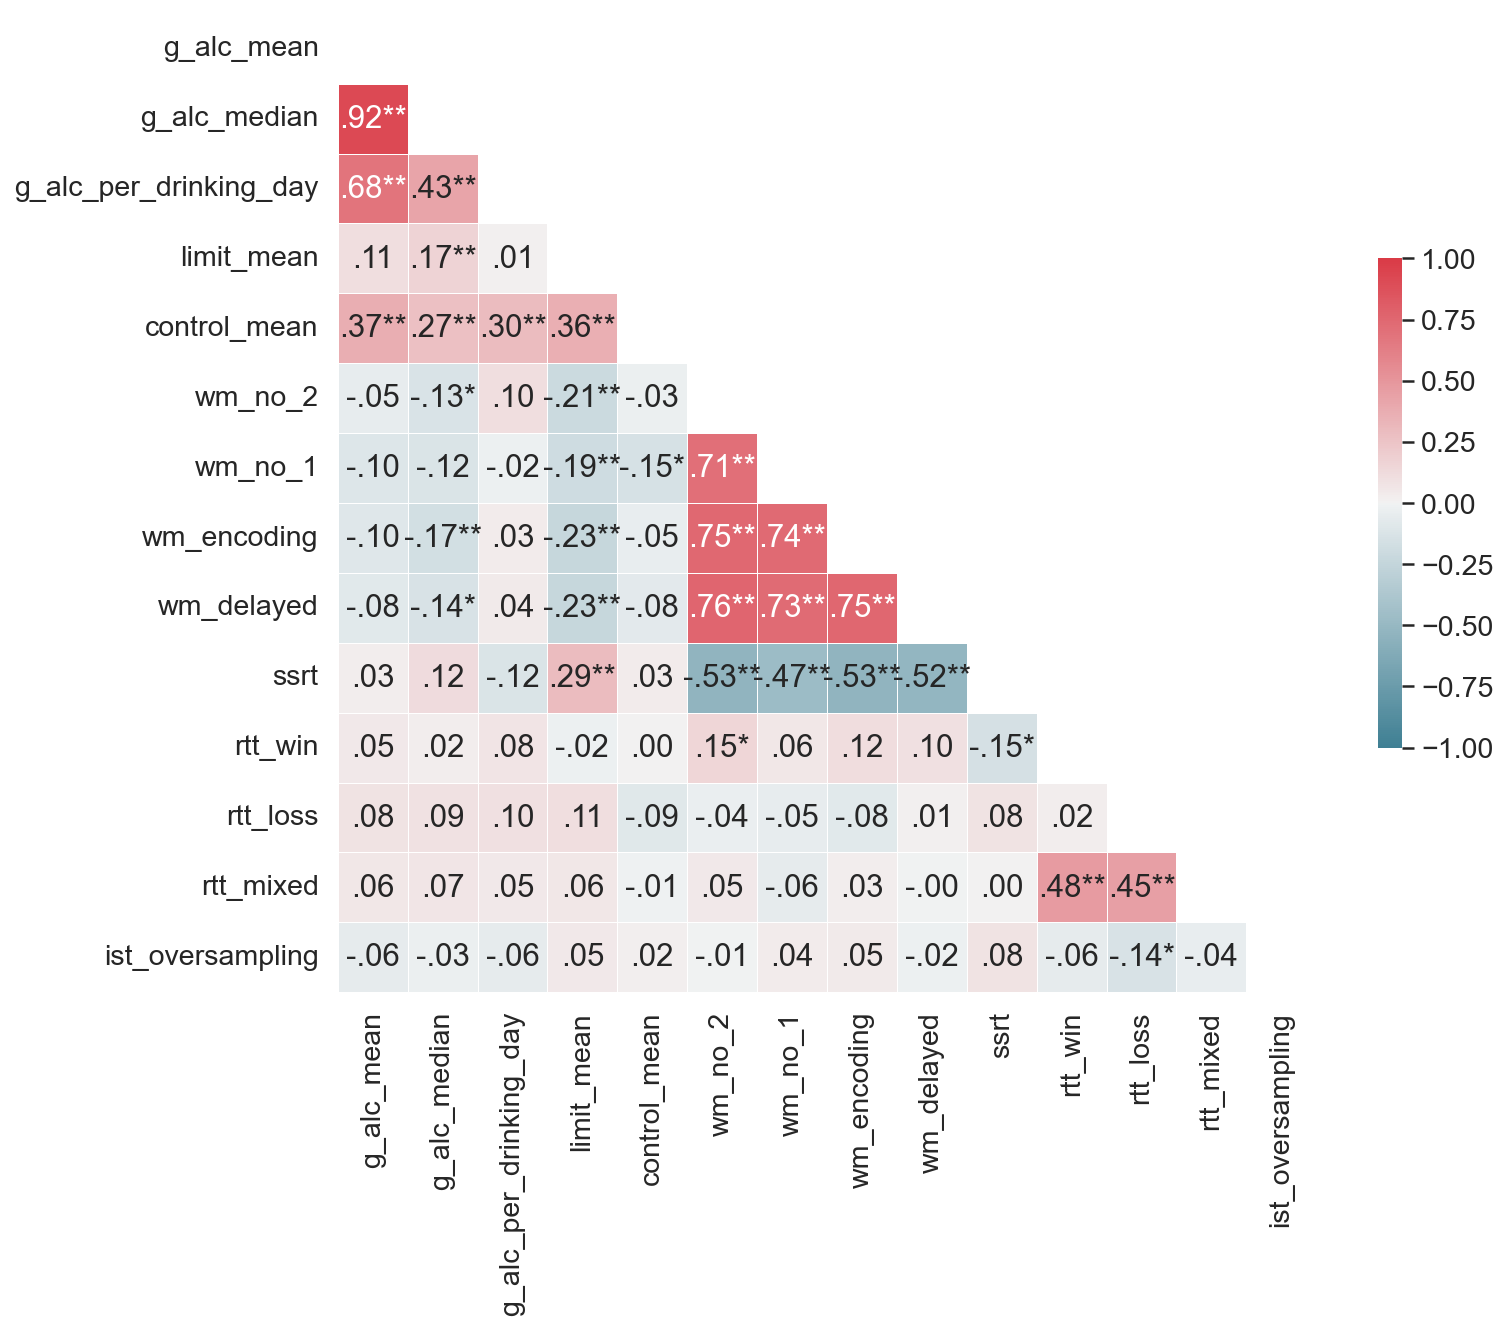

In [ ]:
correlation_matrix(cor.groupby('participant').mean().reset_index().drop(columns = ['session_number']))

### Average longitudinal correlation per participant

In [ ]:
pps = cor.participant.unique()

In [ ]:
cor.groupby('participant').corr().reset_index().groupby('level_1').mean()

,Mean consumption,Median consumption,no distractor (short),no distractor (long),encoding distractor,delayed distractor,session_number,ssrt,% gambles (win),% gambles (loss),% gambles (mixed),oversampling
level_1,,,,,,,,,,,,
% gambles (loss),0.036130,-0.040158,-0.043315,0.002230,-0.038617,-0.052805,-0.026398,-0.054513,0.089416,1.000000,0.178454,-0.022574
% gambles (mixed),0.038719,0.012844,-0.002018,0.018237,0.018253,0.053709,-0.047291,-0.008082,0.141283,0.178454,1.000000,-0.058766
% gambles (win),-0.001587,-0.023148,0.099397,0.002710,-0.019524,0.021331,0.003873,-0.029595,1.000000,0.089416,0.141283,0.002020
Mean consumption,1.000000,0.793060,0.045826,-0.050632,-0.000896,-0.023694,-0.000497,-0.008924,-0.001587,0.036130,0.038719,-0.024598
Median consumption,0.793060,1.000000,0.009254,0.002575,-0.039624,-0.044860,0.050407,-0.040121,-0.023148,-0.040158,0.012844,-0.003626
delayed distractor,-0.023694,-0.044860,0.088372,0.076691,0.126020,1.000000,0.103987,-0.029606,0.021331,-0.052805,0.053709,-0.040491
encoding distractor,-0.000896,-0.039624,0.071333,0.099706,1.000000,0.126020,0.030712,-0.032082,-0.019524,-0.038617,0.018253,-0.007819
no distractor (long),-0.050632,0.002575,0.054512,1.000000,0.099706,0.076691,0.093250,0.008971,0.002710,0.002230,0.018237,0.034246
no distractor (short),0.045826,0.009254,1.000000,0.054512,0.071333,0.088372,0.070490,-0.087944,0.099397,-0.043315,-0.002018,0.022939


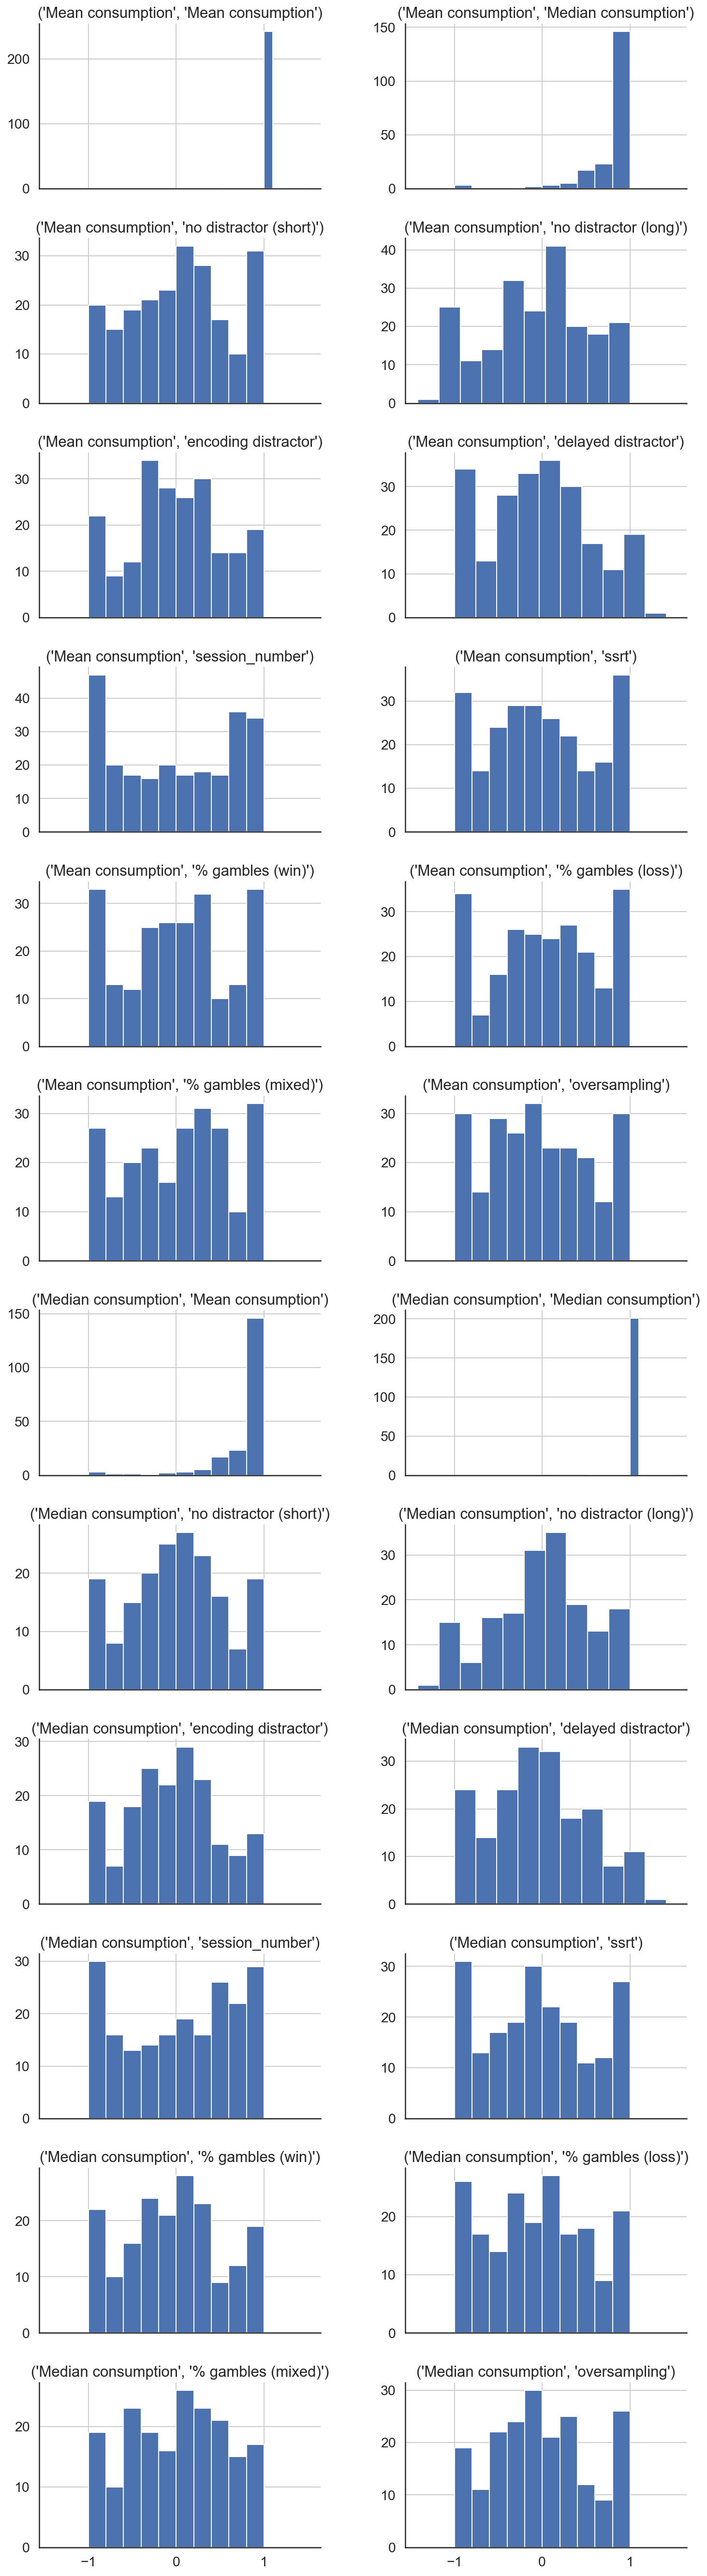

In [ ]:
cor.groupby('participant').corr().drop(columns=['session_number']).unstack()[['Mean consumption','Median consumption']].hist(figsize=(12,48), layout = (12,2), sharex=True);

## Factor score correlations

In [ ]:
factor_loadings = np.array([[ 7.92661829e-01,  4.78790772e-02,  4.86401575e-03],
       [ 7.63220032e-01, -1.40617072e-02,  3.25907524e-04],
       [ 7.49311048e-01, -2.53512341e-02, -1.37956558e-02],
       [ 8.18257813e-01,  1.04559605e-02, -9.31641296e-03],
       [ 4.63416842e-01, -7.38915150e-02,  1.43192654e-01],
       [ 1.79143311e-02, -2.67090047e-02,  8.60738590e-01],
       [ 7.90922395e-03,  9.98916460e-01, -1.35399086e-02],
       [-1.02745794e-01,  3.35920712e-01,  3.78108731e-01],
       [-7.42983269e-02, -1.32799950e-01, -6.17402248e-02]])

In [ ]:
import warnings
import numpy as np
from sklearn.preprocessing import scale

def matrix_sqrt(x):
    """
    Compute the square root of the eigen values (eVal),
    and then take $eVec * diag(eVals^0.5) * eVec^T$
    """
    evals, evecs = np.linalg.eig(x)
    evals[evals < 0] = np.finfo(float).eps
    sqrt_evals = np.sqrt(evals)
    return evecs.dot(np.diag(sqrt_evals)).dot(evecs.T)


def inv_matrix_sqrt(x):
    """
    Compute the inverse square root of the eigen values (eVal),
    and then take $eVec * diag(1 / eVals^0.5) * eVec^T$
    """
    evals, evecs = np.linalg.eig(x)
    if np.iscomplex(evals).any():
        warnings.warn('Complex eigen values detected; results are suspect.')
        return x
    evals[evals < np.finfo(float).eps] = 100 * np.finfo(float).eps
    inv_sqrt_evals =  1 / np.sqrt(evals)
    return evecs.dot(np.diag(inv_sqrt_evals)).dot(evecs.T)


def ten_berge(X, loadings, phi=None):
    """
    Estimate factor scores using the "ten Berge" method.

    Parameters
    ----------
    X : array-like
        The data set
    loadings : array-like
        The loadings matrix

    Reference
    ----------
    https://www.sciencedirect.com/science/article/pii/S0024379597100076
    """
    # get the number of factors from the loadings
    n_factors = loadings.shape[1]
    corr = np.corrcoef(X, rowvar=False)
    # if `phi` is None, create a diagonal matrix
    phi = np.diag(np.ones(n_factors)) if phi is None else phi
    # calculate intermediate metrics
    load = loadings.dot(matrix_sqrt(phi))
    corr_inv = inv_matrix_sqrt(corr)
    temp = corr_inv.dot(load)\
                   .dot(inv_matrix_sqrt(load.T.dot(np.linalg.inv(corr))
                                              .dot(load)))
    # calcualte weights
    weights = corr_inv.dot(temp)\
                      .dot(matrix_sqrt(phi))
    # calculate scores, given weights
    scores = scale(X).dot(weights)
    return scores

In [ ]:
tasks_session = tasks.set_index(['participant','session_number'])
tasks_session['ssrt'] = -tasks_session.ssrt

In [ ]:
import pickle
with open('../data/interim/fa.pkl', 'rb') as f:
    fa = pickle.load(f)

In [ ]:
factor_scores = pd.DataFrame(ten_berge(tasks_session, fa.loadings_))
factor_scores.columns = ['Factor_1','Factor_2','Factor_3']
factor_scores = pd.concat([tasks_session.reset_index(),factor_scores],axis = 1)
factor_scores['gbe_index'] = factor_scores.participant + '_' + factor_scores.session_number.apply(lambda x: '%03d'%int(x))

In [ ]:
factor_scores

,participant,session_number,wm_no_2,wm_no_1,wm_encoding,wm_delayed,ssrt,rtt_win,rtt_loss,rtt_mixed,ist_oversampling,Factor_1,Factor_2,Factor_3,gbe_index
0,b001,3.0,0.901783,0.913540,0.981140,0.970788,-334.965298,0.233080,0.656074,0.193606,0.247006,0.853037,0.835712,-1.396638,b001_003
1,b001,7.0,0.968729,0.976694,0.981140,0.970788,-308.747529,0.233080,0.184287,0.328255,0.403552,1.047353,-0.868656,-1.227780,b001_007
2,b001,9.0,0.858903,0.976694,0.981140,0.970788,-368.181926,0.233080,0.127197,0.193606,0.501393,0.738944,-1.065353,-1.434380,b001_009
3,b001,11.0,0.858903,0.976694,0.981140,0.970788,-354.732464,0.663045,0.127197,0.193606,0.501393,0.752262,-1.077040,-0.002059,b001_011
4,b001,12.0,0.968729,0.871100,0.881358,0.873498,-355.124973,0.373294,0.184287,0.401692,0.364416,0.323823,-0.806664,-0.837047,b001_012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,m290,5.0,0.736448,0.951793,0.956992,0.812816,-444.728309,0.849122,0.686716,0.706454,-1.019708,-0.139819,0.886626,0.524770,m290_005
2225,m290,6.0,0.785920,0.951793,0.956992,0.669176,-323.390101,0.217077,0.099233,0.559915,-1.039277,-0.163938,-1.122164,-1.011390,m290_006
2226,m290,10.0,0.833585,0.827728,0.686491,0.933216,-337.245555,0.784975,0.411288,0.559915,-1.039277,-0.188715,-0.096037,0.731455,m290_010
2227,m290,4.0,0.736448,0.827728,0.835930,0.933216,-341.300497,0.217077,0.212119,0.335172,-0.980572,-0.102720,-0.764418,-1.208722,m290_004


2229


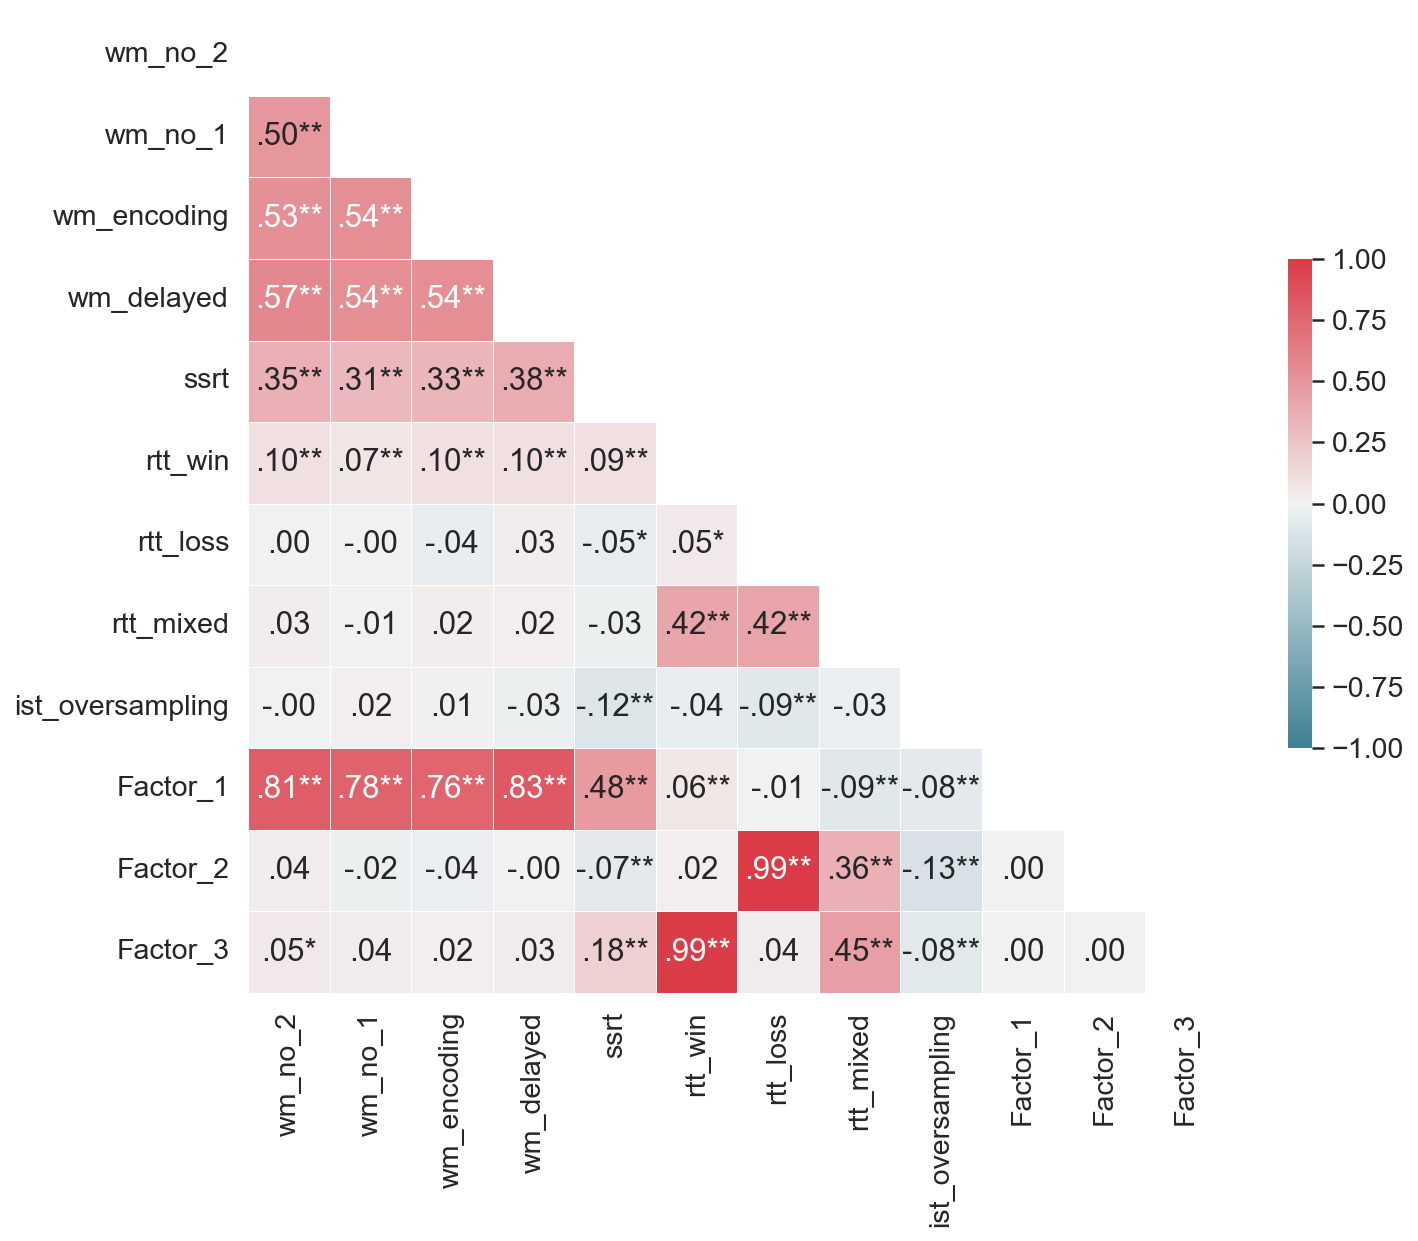

In [ ]:
correlation_matrix(factor_scores.drop(columns = ['session_number','gbe_index']))

### Based on mixed models

In [ ]:
from trr265.stats import decompose_within_between

In [ ]:
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna()
cor3 = cor2.set_index('participant')
columns = ['limit_mean','limit_median','control_mean','Factor_1','Factor_2','Factor_3']
cor4 = decompose_within_between(cor3.reset_index(),columns = columns)


In [ ]:
def lmer_within_between(x, y, df, model_output = False): 
    if '_'.join(x.split('_')[:-1]) == y:
        return np.nan, np.nan
                
    if ('within' in x+y) and ('between' in x+y):
        return np.nan,np.nan # These should be nan
    if ('between' in y) or('within' in y):
        return np.nan,np.nan
    if 'within' in x:
        x_control = '_'.join(x.split('_')[:-1])+'_between'
    #elif 'between' in x:
    #    return np.nan, np.nan
        #x_control = '_'.join(x.split('_')[:-1])+'_within'
    else:
        return lmer(x,y,df)
    
    if model_output:
        model_output = 'print(summary(m))'
    else:
        model_output = ''

    
    R = biuR.wrapper.R()
    p = R("""
    library(lmerTest)
    library(ggeffects)
    # Running the model
    control=lmerControl(optimizer = "bobyqa", optCtrl=list(maxfun=1e6))
    m = lmer(%(y)s ~ %(x)s + %(x_control)s + (1 | participant), data=df, na.action = na.exclude) 
    %(model_output)s
    estimate = summary(m)$coefficients[2]
    p_value = summary(m)$coefficients[14]
    """%{'x':x,'x_control':x_control,'y':y,'model_output':model_output},push=dict(df=df))
    
    
    m = R("""m""")
    estimate = R("""estimate""")
    p_value = R("""p_value""")

    return estimate[0], p_value[0]
         


In [ ]:
lmer_within_between('Factor_1_within','g_alc_mean', cor4, model_output=True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_mean ~ Factor_1_within + Factor_1_between + (1 | participant)
   Data: df

REML criterion at convergence: 2785.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8434 -0.4566 -0.0584  0.4263  9.7677 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.7426   0.8617  
 Residual                0.2785   0.5278  
Number of obs: 1363, groups:  participant, 257

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)
(Intercept)        -0.01974    0.05672  250.49304  -0.348    0.728
Factor_1_within     0.00814    0.01430 1103.84165   0.569    0.569
Factor_1_between   -0.08413    0.05667  247.53779  -1.485    0.139

Correlation of Fixed Effects:
            (Intr) Fctr_1_w
Fctr_1_wthn 0.000          
Fctr_1_btwn 0.028  0.000   


(0.008139599722243067, 0.5693380869040354)

In [ ]:
def lmer(x, y, df):    
    R = biuR.wrapper.R()
    p = R("""
    library(lmerTest)
    library(ggeffects)
    # Running the model
    control=lmerControl(optimizer = "bobyqa", optCtrl=list(maxfun=1e6))
    m = lmer(%(y)s ~ %(x)s + (1 | participant), data=df, na.action = na.exclude) 
    estimate = summary(m)$coefficients[2]
    p_value = summary(m)$coefficients[10]
    """%{'x':x,'y':y},push=dict(df=df))
    
    
    m = R("""m""")
    estimate = R("""estimate""")
    p_value = R("""p_value""")

    return estimate[0], p_value[0]

In [ ]:
from trr265.stats import decompose_within_between

1363


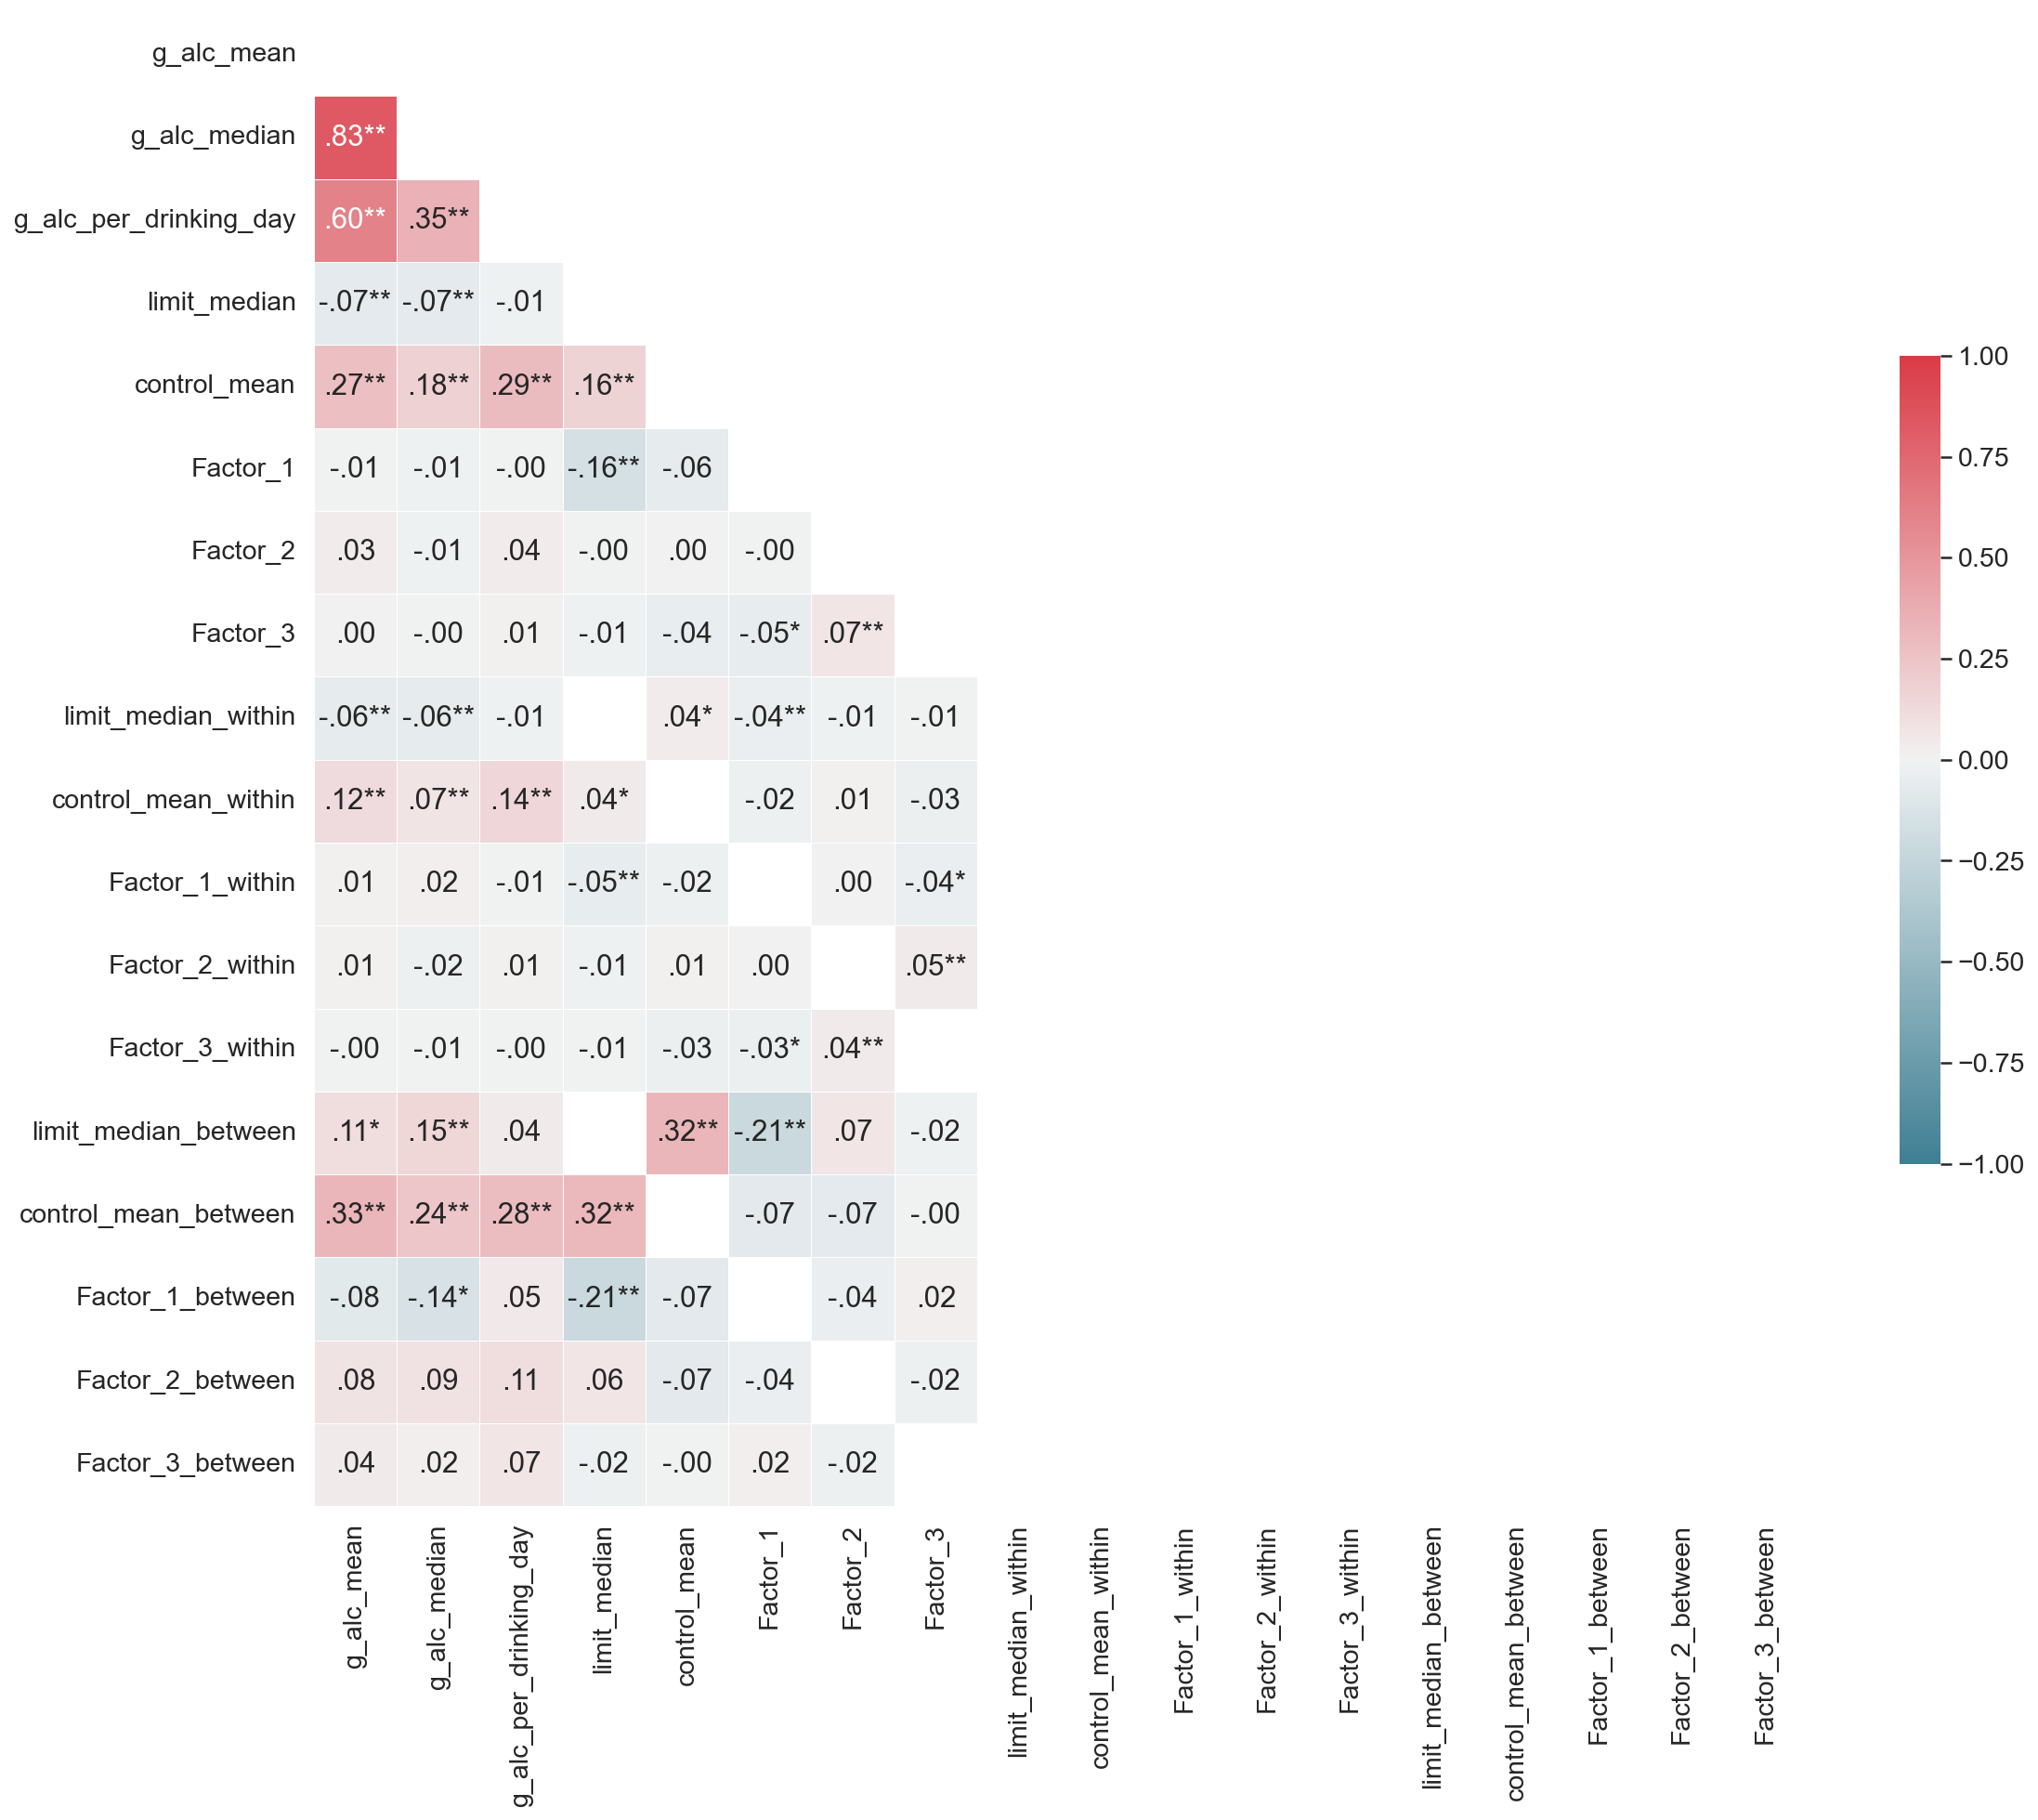

In [ ]:
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna()
cor3 = cor2.set_index('participant')
columns = ['limit_median','control_mean','Factor_1','Factor_2','Factor_3']
cor3 = decompose_within_between(cor3.reset_index(),columns = columns, result='both', drop = False).set_index('participant')
cor3 = (cor3-cor3.mean())/cor3.std()
correlation_matrix(cor3.reset_index(), corr_func = lmer_within_between, size = (18,16))

#### Intention and consumption

In [ ]:
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna()
cor3_d = cor2.set_index('participant')
columns = ['limit_median','control_mean','Factor_1','Factor_2','Factor_3']
cor3_d = decompose_within_between(cor3_d.reset_index(),columns = columns, result='both', drop = False).set_index('participant')

In [ ]:
lmer_within_between('limit_median_within', 'g_alc_median',cor3.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ limit_median_within + limit_median_between + (1 |  
    participant)
   Data: df

REML criterion at convergence: 2868.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3094 -0.4148 -0.0767  0.3932  8.3979 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6906   0.8310  
 Residual                0.3041   0.5515  
Number of obs: 1363, groups:  participant, 257

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            -0.04046    0.05515  250.65022  -0.734  0.46385    
limit_median_within    -0.06174    0.01494 1105.08210  -4.131 3.88e-05 ***
limit_median_between    0.15040    0.05224  260.28365   2.879  0.00432 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) lmt_mdn_w
lmt_mdn_wth  0.000          
lmt

(-0.061738878944833576, 3.8765797882793797e-05)

<AxesSubplot:xlabel='limit_median_between', ylabel='g_alc_median'>

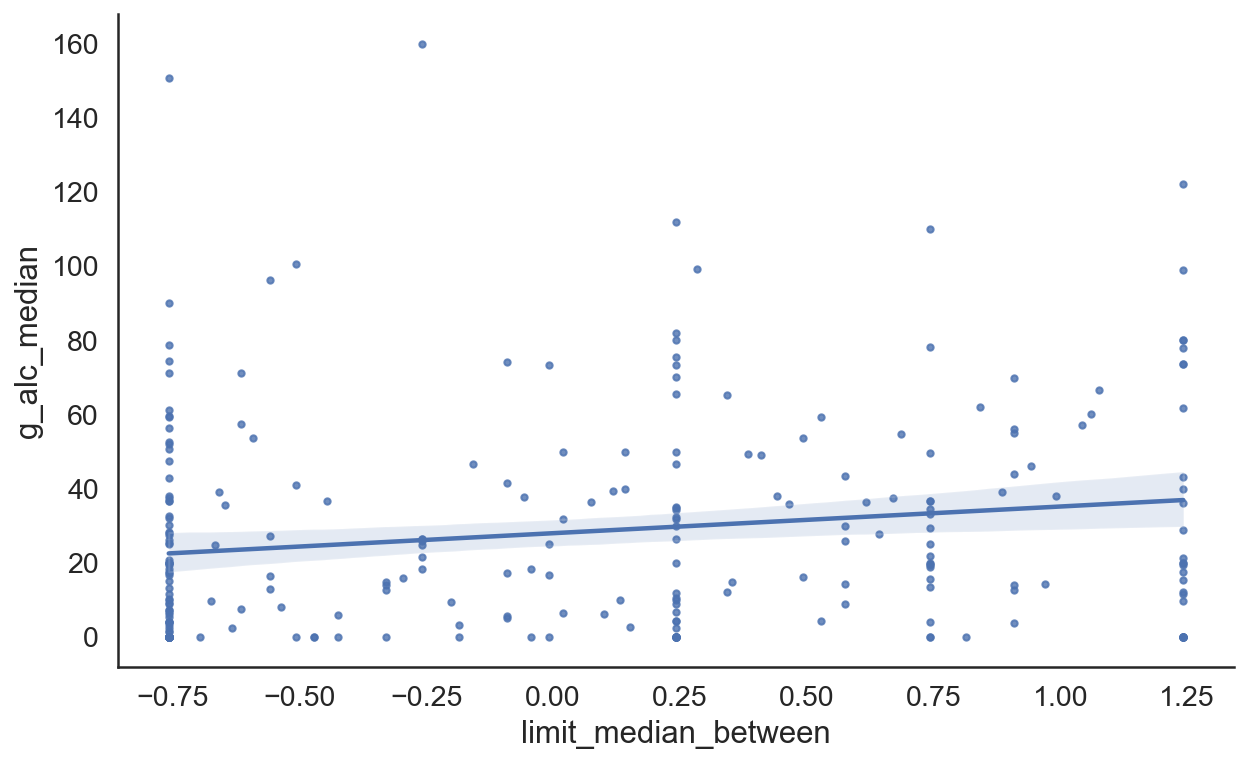

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'limit_median_between', y = 'g_alc_median', data = cor3_d.groupby('participant').mean(),scatter_kws={'s':10})

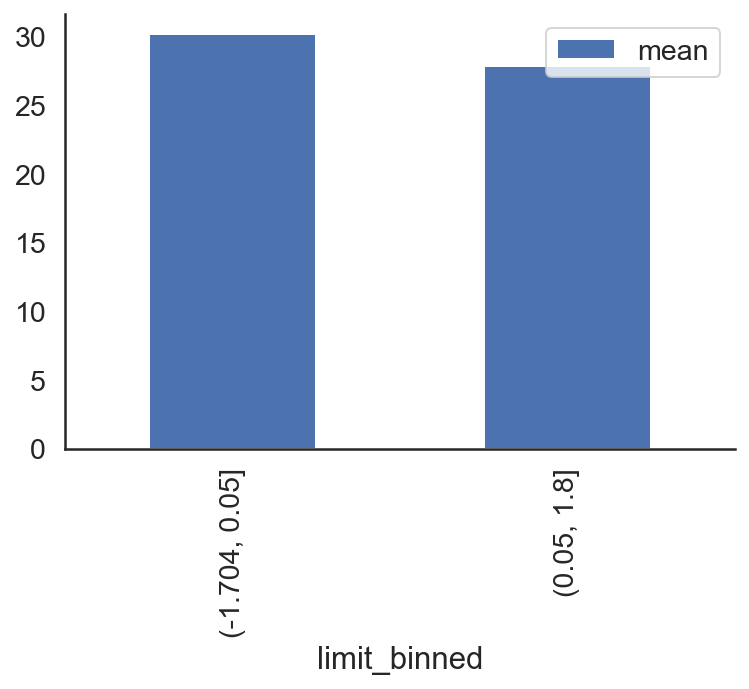

<AxesSubplot:xlabel='limit_median_within', ylabel='g_alc_median'>

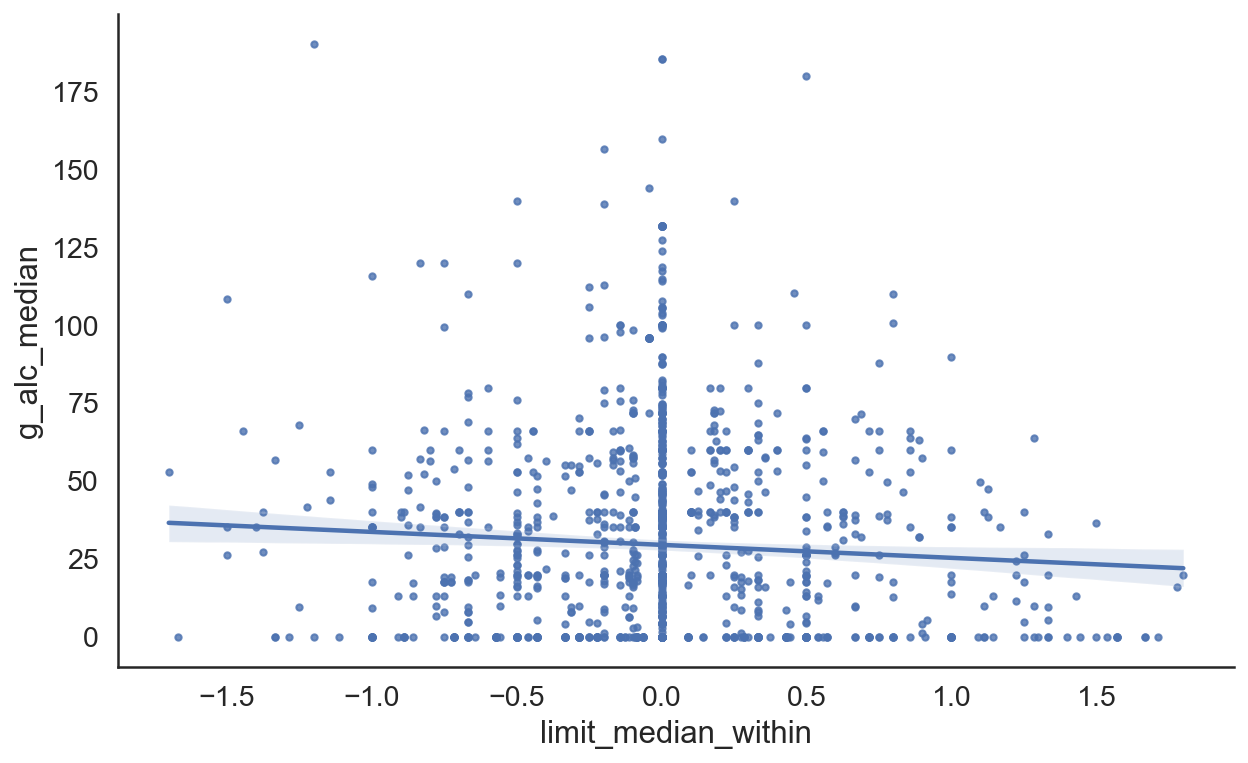

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'limit_median_within', y = 'g_alc_median', data = cor3_d,scatter_kws={'s':10})

Text(0.5, 0, 'limit median')

<Figure size 720x432 with 0 Axes>

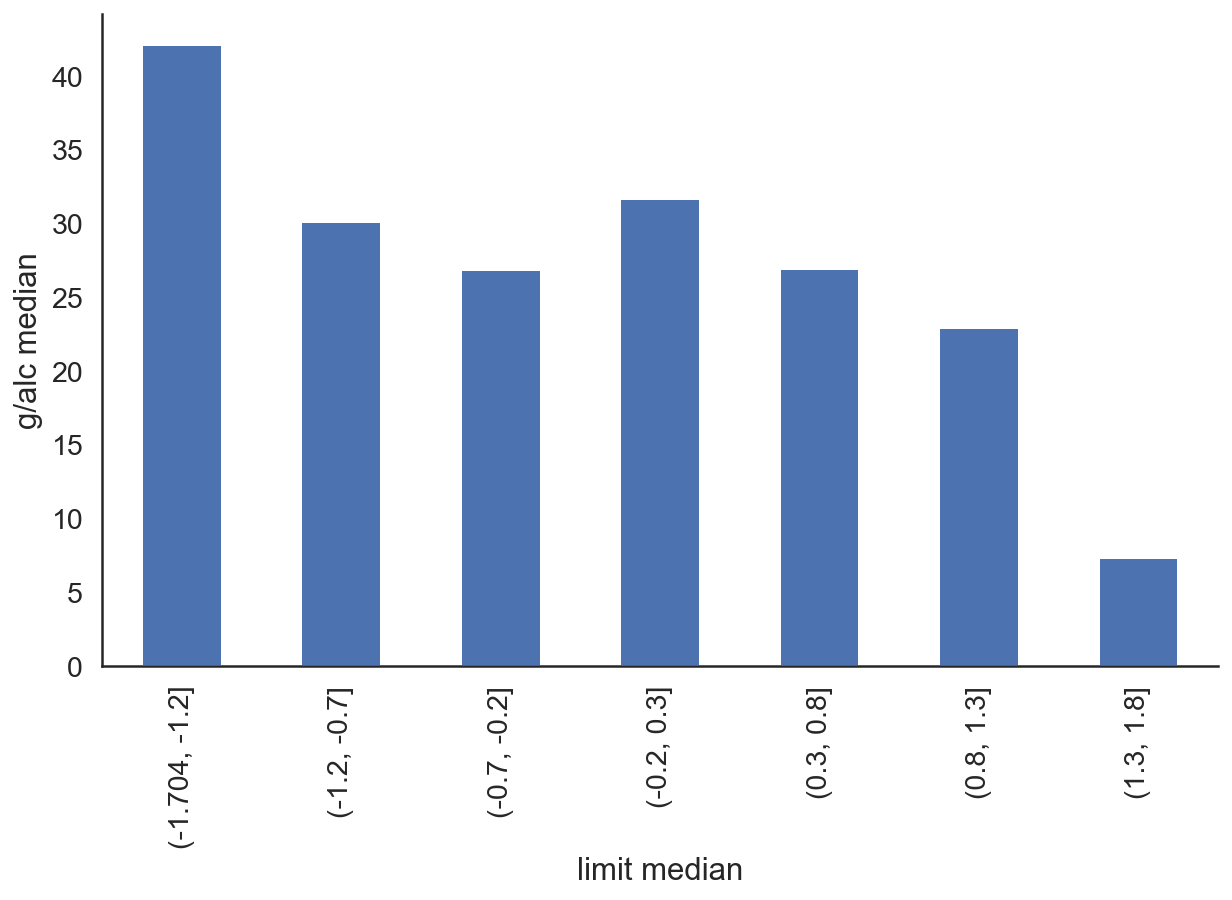

In [ ]:
plt.figure(figsize=(10,6))
cor3_d['limit_binned'] = pd.cut(cor3_d.limit_median_within, 7)
ax = cor3_d.groupby('limit_binned').g_alc_median.agg([np.mean, np.std]).reset_index().plot.bar(x = 'limit_binned', y = 'mean',figsize=(10,6), legend = False)
ax.set_ylabel('g/alc median')
ax.set_xlabel('limit median')


#### Perceived control and consumption

In [ ]:
lmer_within_between('control_mean_within', 'g_alc_median',cor3.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ control_mean_within + control_mean_between + (1 |  
    participant)
   Data: df

REML criterion at convergence: 2849.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2676 -0.4189 -0.0491  0.3827  8.8739 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6547   0.8091  
 Residual                0.3021   0.5497  
Number of obs: 1363, groups:  participant, 257

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            -0.05086    0.05392  249.54654  -0.943    0.347    
control_mean_within     0.07423    0.01489 1104.70629   4.984 7.24e-07 ***
control_mean_between    0.23931    0.05236  256.81046   4.571 7.56e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) cntrl_mn_w
cntrl_mn_wt  0.000           
c

(0.07422668920142558, 7.241561828725754e-07)

<AxesSubplot:xlabel='control_mean_between', ylabel='g_alc_median'>

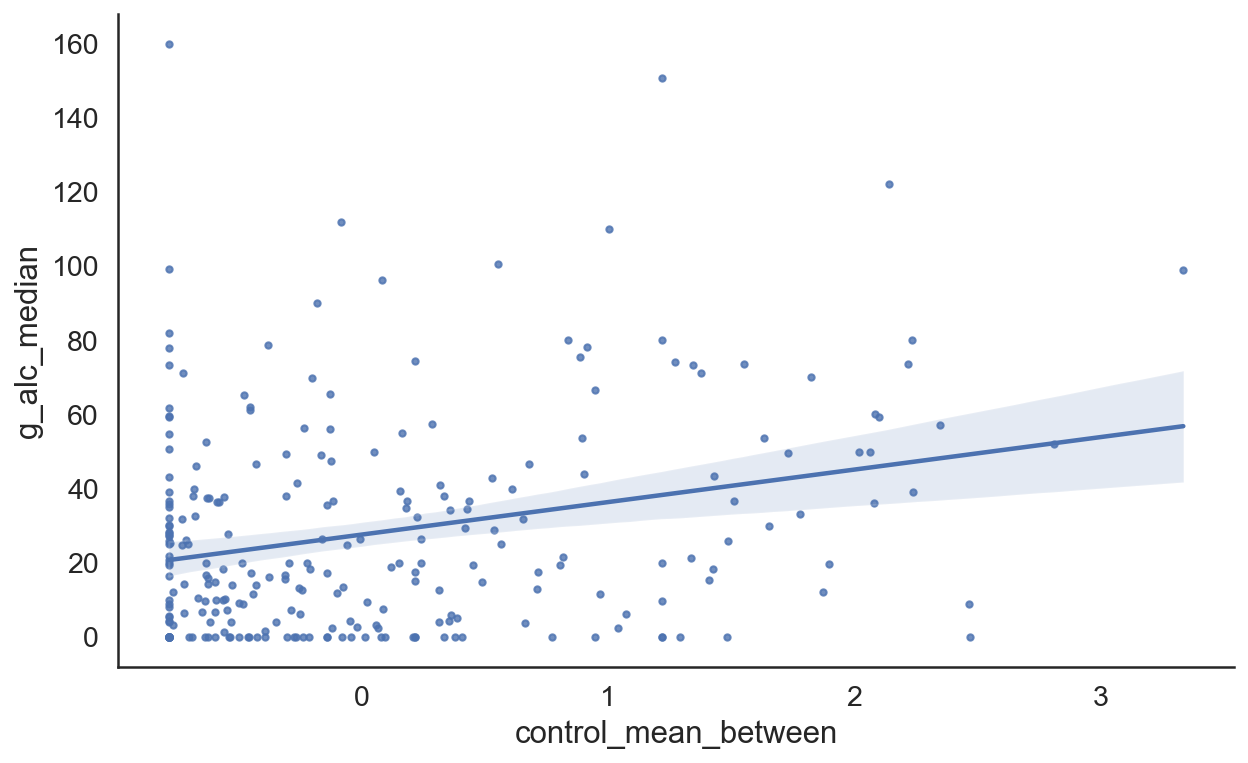

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'control_mean_between', y = 'g_alc_median', data = cor3_d.groupby('participant').mean(),scatter_kws={'s':10})

<AxesSubplot:xlabel='control_mean_within', ylabel='g_alc_median'>

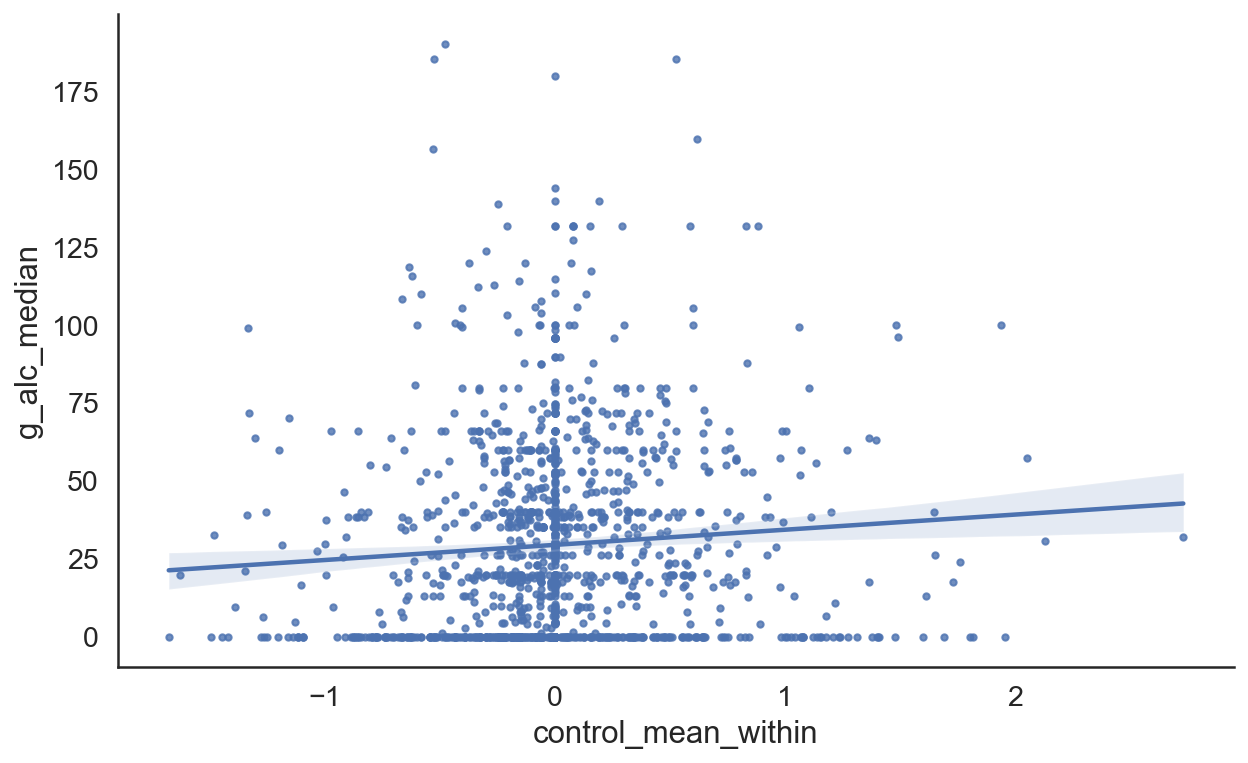

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'control_mean_within', y = 'g_alc_median', data = cor3_d,scatter_kws={'s':10})

Text(0.5, 0, 'control')

<Figure size 720x432 with 0 Axes>

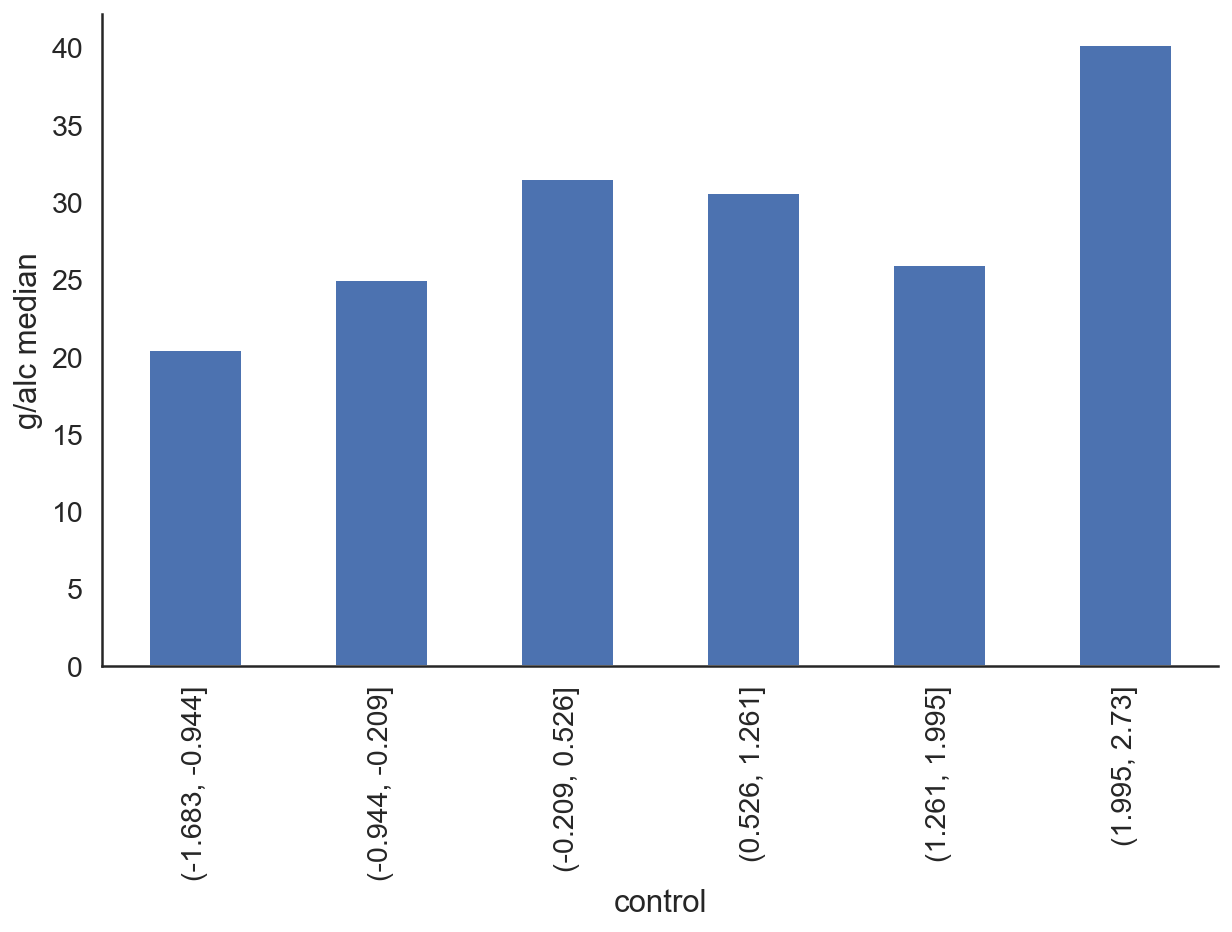

In [ ]:
plt.figure(figsize=(10,6))
cor3_d['limit_binned'] = pd.cut(cor3_d.control_mean_within, 6)
ax = cor3_d.groupby('limit_binned').g_alc_median.agg([np.mean, np.std]).reset_index().plot.bar(x = 'limit_binned', y = 'mean',figsize=(10,6), legend = False)
ax.set_ylabel('g/alc median')
ax.set_xlabel('control')

#### Cognitive control and intention

In [ ]:
lmer_within_between('Factor_1_within', 'limit_median',cor3.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: limit_median ~ Factor_1_within + Factor_1_between + (1 | participant)
   Data: df

REML criterion at convergence: 3173.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2151 -0.4164 -0.0875  0.4116  3.3401 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.5678   0.7535  
 Residual                0.4124   0.6422  
Number of obs: 1363, groups:  participant, 257

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)         0.01850    0.05168  246.71642   0.358  0.72069    
Factor_1_within    -0.04951    0.01740 1105.74661  -2.845  0.00452 ** 
Factor_1_between   -0.21330    0.05153  242.98356  -4.139 4.81e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) Fctr_1_w
Fctr_1_wthn 0.000          
Fctr_1_btwn 0.030  0.000   


(-0.0495084276038421, 0.004521286720484388)

<AxesSubplot:xlabel='Factor_1_between', ylabel='limit_median'>

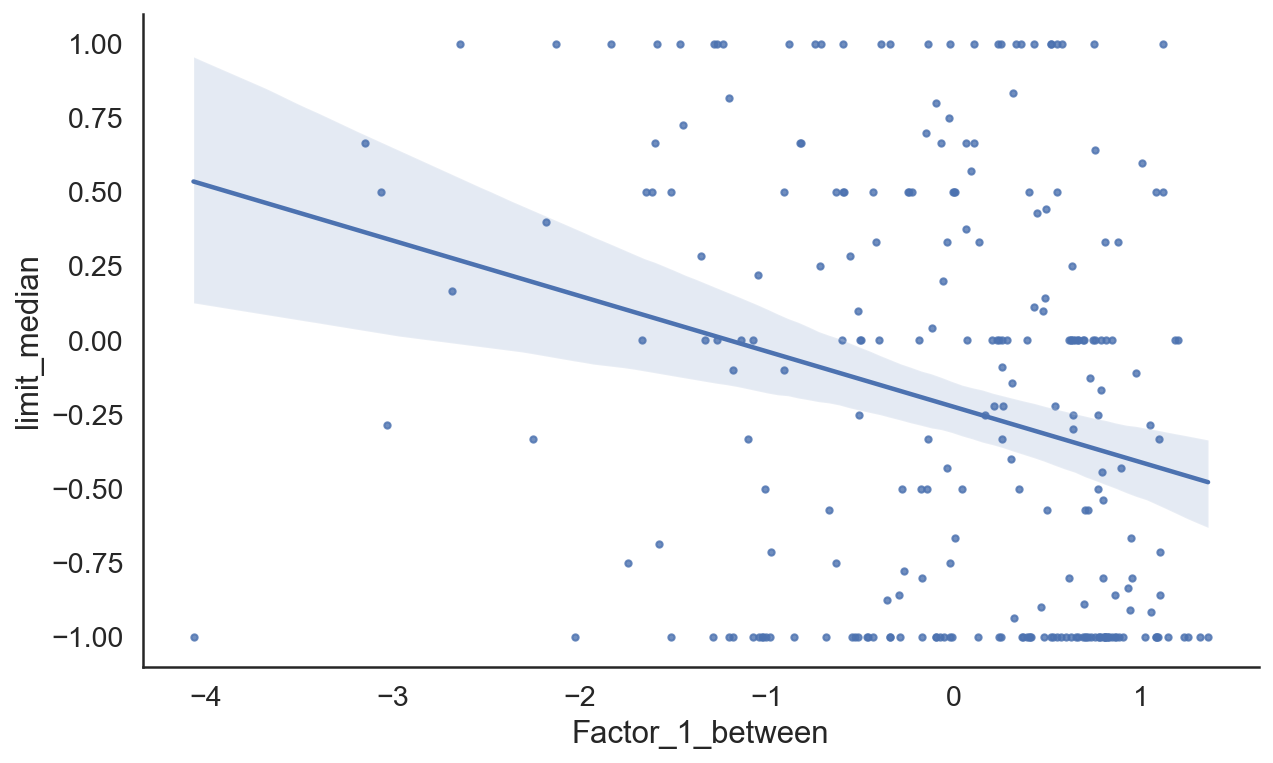

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'Factor_1_between', y = 'limit_median', data = cor3_d.groupby('participant').mean(),scatter_kws={'s':10})

<AxesSubplot:xlabel='Factor_1_within', ylabel='limit_median'>

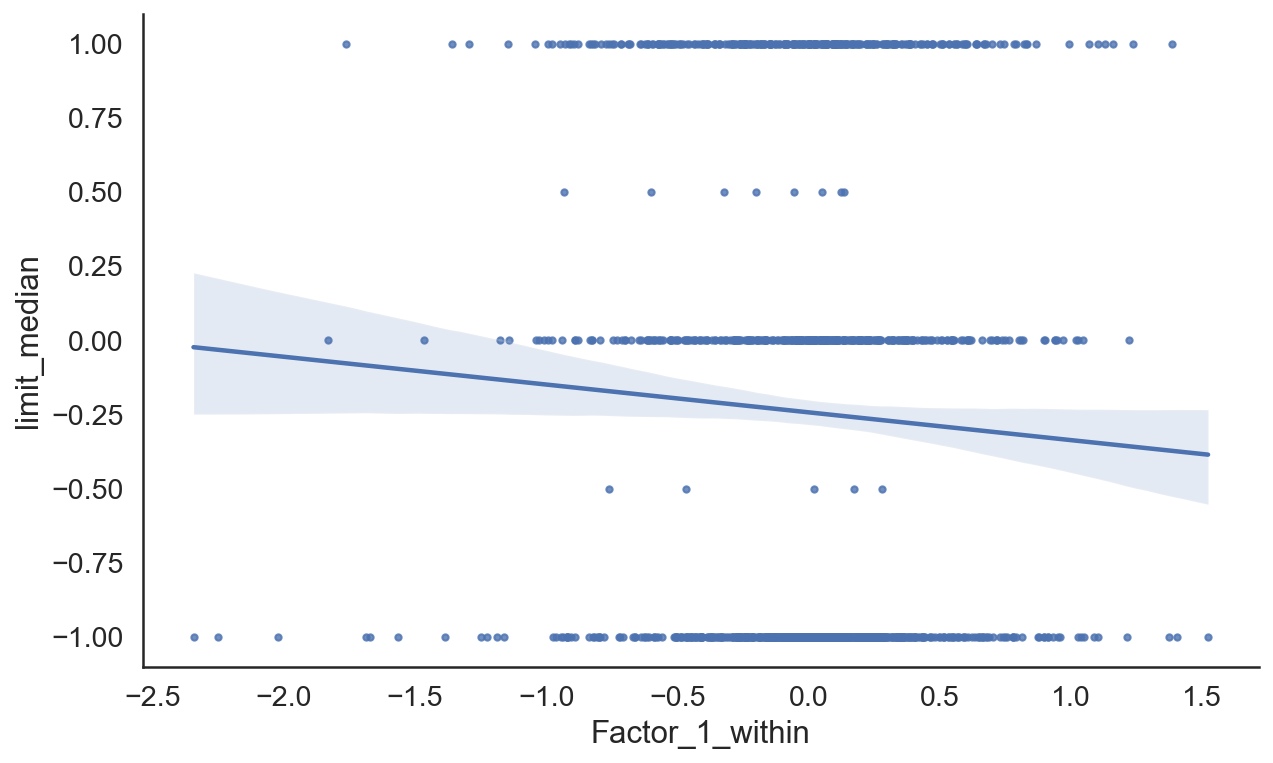

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'Factor_1_within', y = 'limit_median', data = cor3_d,scatter_kws={'s':10})

Text(0.5, 0, 'Factor 1 within')

<Figure size 720x432 with 0 Axes>

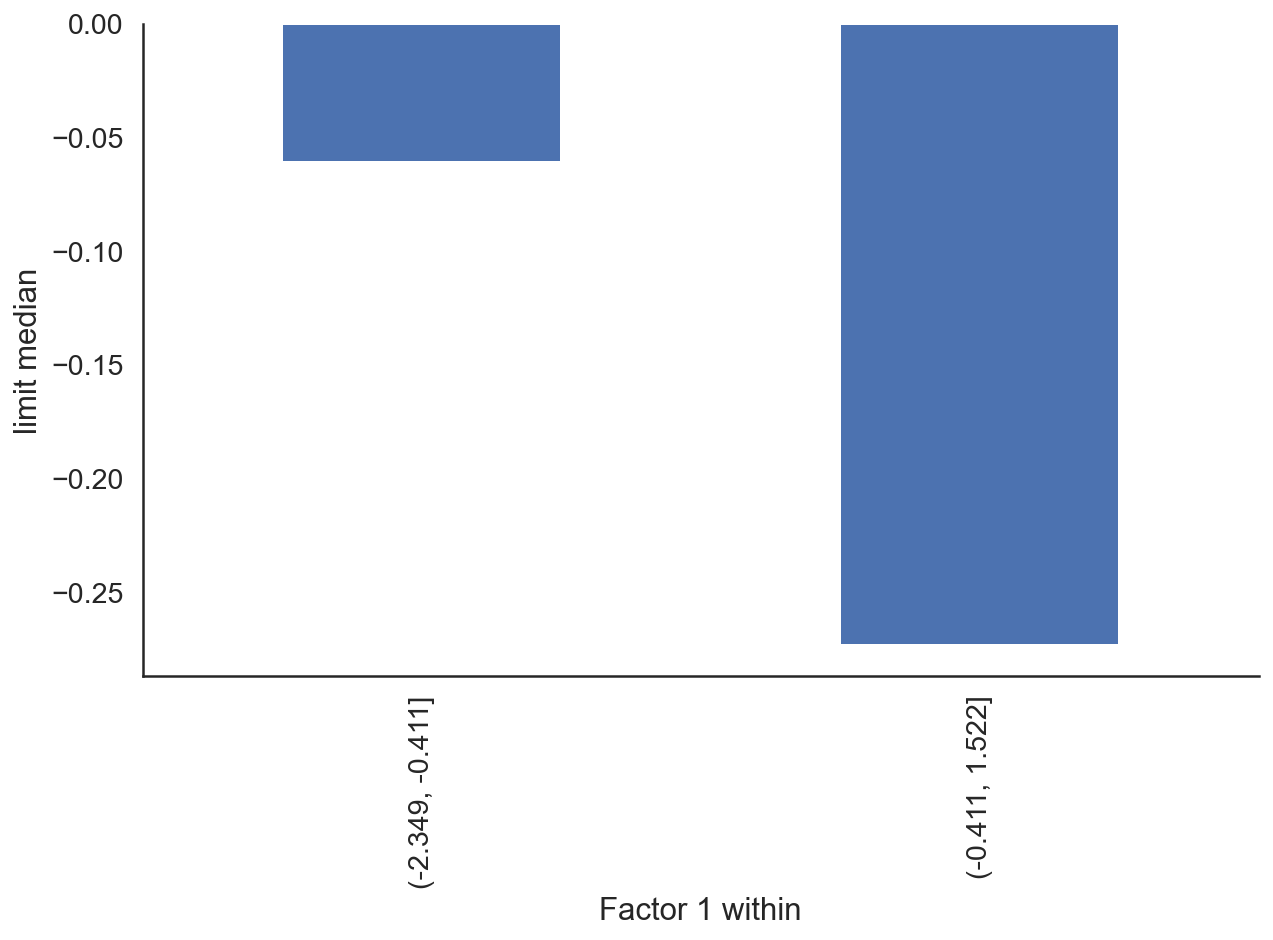

In [ ]:
plt.figure(figsize=(10,6))
cor3_d['limit_binned'] = pd.cut(cor3_d.Factor_1_within, 2)
ax = cor3_d.groupby('limit_binned').limit_median.agg([np.mean, np.std]).reset_index().plot.bar(x = 'limit_binned', y = 'mean',figsize=(10,6), legend = False)
ax.set_ylabel('limit median')
ax.set_xlabel('Factor 1 within')

#### Cognitive control and perceived control

In [ ]:
lmer_within_between('Factor_1_within', 'control_mean',cor3.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: control_mean ~ Factor_1_within + Factor_1_between + (1 | participant)
   Data: df

REML criterion at convergence: 2857.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0621 -0.4315 -0.1137  0.3874  5.0899 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.7089   0.8419  
 Residual                0.2995   0.5473  
Number of obs: 1363, groups:  participant, 257

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)
(Intercept)         0.05473    0.05575  251.36924   0.982    0.327
Factor_1_within    -0.02043    0.01483 1105.44015  -1.378    0.169
Factor_1_between   -0.07206    0.05568  248.22314  -1.294    0.197

Correlation of Fixed Effects:
            (Intr) Fctr_1_w
Fctr_1_wthn 0.000          
Fctr_1_btwn 0.028  0.000   


(-0.020432750076413448, 0.16853578036167663)

#### Cognitive control and consumption

In [ ]:
lmer_within_between('Factor_1_within', 'g_alc_median',cor3.reset_index(), model_output = True)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ Factor_1_within + Factor_1_between + (1 | participant)
   Data: df

REML criterion at convergence: 2886.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2114 -0.3958 -0.0866  0.4168  8.5779 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6960   0.8343  
 Residual                0.3085   0.5554  
Number of obs: 1363, groups:  participant, 257

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)  
(Intercept)        -0.03955    0.05538  251.15490  -0.714   0.4758  
Factor_1_within     0.01661    0.01505 1105.54179   1.104   0.2699  
Factor_1_between   -0.13771    0.05531  247.94005  -2.490   0.0134 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) Fctr_1_w
Fctr_1_wthn 0.000          
Fctr_1_btwn 0.028  0.000   


(0.016612200613881453, 0.2698995414458652)

<AxesSubplot:xlabel='Factor_1_between', ylabel='g_alc_median'>

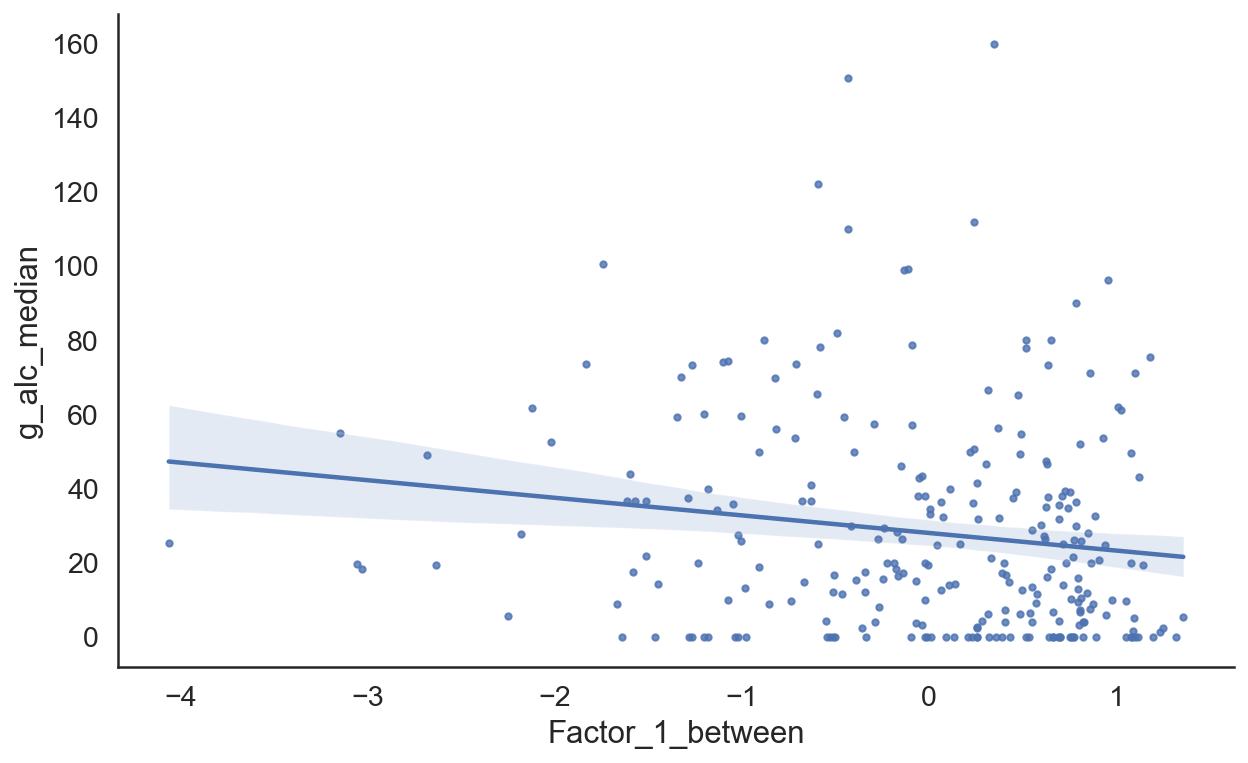

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'Factor_1_between', y = 'g_alc_median', data = cor3_d.groupby('participant').mean(),scatter_kws={'s':10})

In [ ]:
cor4 = cor3.reset_index()

In [ ]:
stats.pearsonr(cor4['Factor_1'],cor4['Factor_3'])

(-0.005433963432902802, 0.8411419605390101)

In [ ]:
%%R -i cor4
require(lmerTest)
m <- lmer(Factor_3 ~ Factor_1 + (1|participant), data = cor4)
summary(m)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Factor_3 ~ Factor_1 + (1 | participant)
   Data: cor4

REML criterion at convergence: 2868.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9503 -0.5413  0.0723  0.5285  3.0315 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.6999   0.8366  
 Residual                0.3044   0.5518  
Number of obs: 1363, groups:  participant, 257

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)  
(Intercept)   -0.03930    0.05547  253.53863  -0.709   0.4793  
Factor_1      -0.06097    0.03088 1316.20379  -1.974   0.0486 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr)
Factor_1 0.014 


#### Intention as factor

In [ ]:
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','session_number','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna()

In [ ]:
%%R -i cor2
require(lmerTest)
m <- lmer(Factor_1 ~ as.factor(limit_median) + (1|participant), data = cor2)
summary(m)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Factor_1 ~ as.factor(limit_median) + (1 | participant)
   Data: cor2

REML criterion at convergence: 2569.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.9531 -0.4431  0.1181  0.4975  3.1604 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.7931   0.8906  
 Residual                0.2272   0.4766  
Number of obs: 1363, groups:  participant, 257

Fixed effects:
                             Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                   0.03149    0.06214  329.15772   0.507   0.6127
as.factor(limit_median)1.5   -0.27024    0.23249 1127.13464  -1.162   0.2453
as.factor(limit_median)2     -0.10142    0.04822 1265.61060  -2.103   0.0356
as.factor(limit_median)2.5   -0.42463    0.18828 1145.09845  -2.255   0.0243
as.factor(limit_median)3     -0.20301    0.05185 1289.64964  -3.916 9.48e-05
                        

In [ ]:
%%R -i cor2
require(lmerTest)
m <- lmer(g_alc_median ~ as.factor(limit_median) + (1|participant), data = cor2)
summary(m)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: g_alc_median ~ as.factor(limit_median) + (1 | participant)
   Data: cor2

REML criterion at convergence: 12284.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2810 -0.4284 -0.0902  0.3890  8.5174 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 743.4    27.27   
 Residual                309.8    17.60   
Number of obs: 1363, groups:  participant, 257

Fixed effects:
                            Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)                  29.9349     1.9787  338.1503  15.128  < 2e-16 ***
as.factor(limit_median)1.5    9.2984     8.5680 1128.8694   1.085  0.27805    
as.factor(limit_median)2     -0.7193     1.7519 1305.0505  -0.411  0.68144    
as.factor(limit_median)2.5   11.4974     6.9275 1152.7338   1.660  0.09725 .  
as.factor(limit_median)3     -5.4823     1.8780 1328.6327  -2.919  0.00357 ** 
---
Sig

### Cross-sectional effects based on longitudinal data

In [ ]:
#factor_scores = factor_scores.set_index('gbe_index').filter(like='Factor')
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna().groupby('participant').mean().reset_index()

260


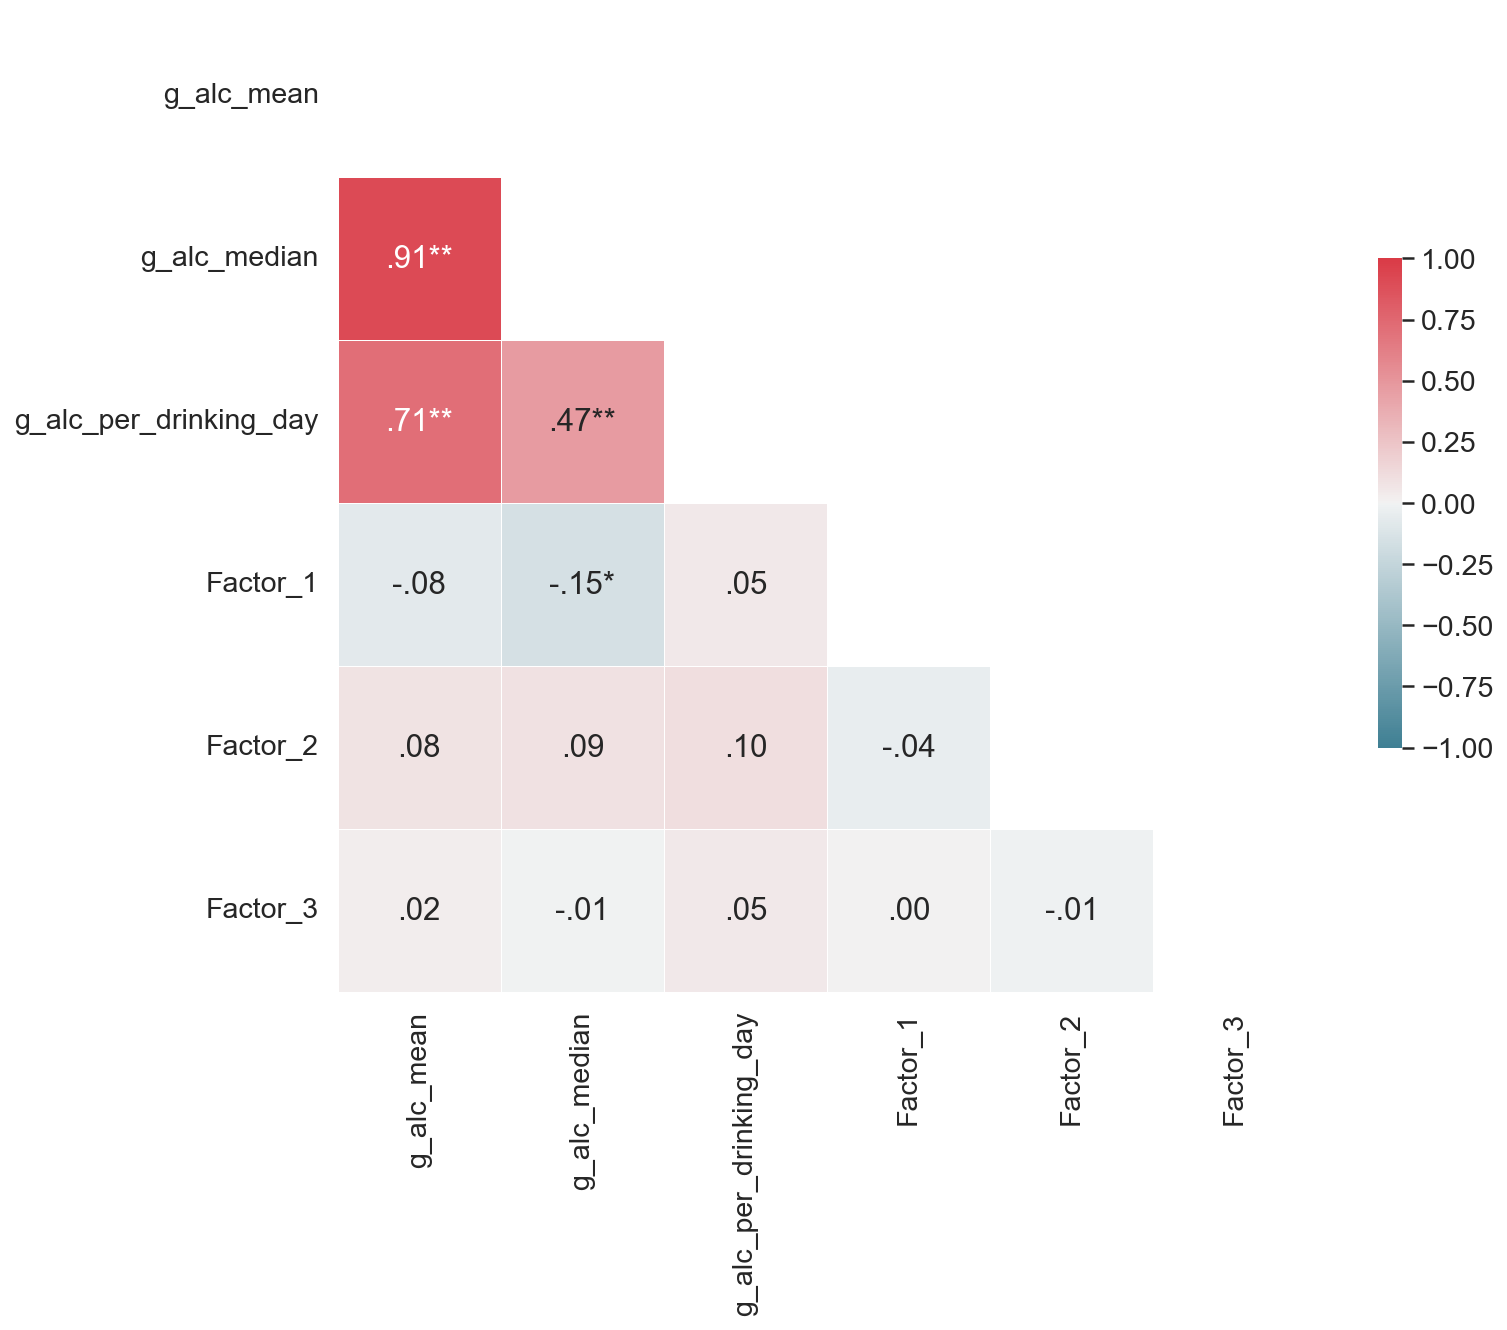

In [ ]:
correlation_matrix(cor2)

In [ ]:
from scipy import stats
stats.pearsonr(cor2['Factor_1'], cor2['g_alc_median'])

(-0.15449853186255624, 0.013151787779142813)

### Average longitudinal correlation per participant

In [ ]:
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna()

In [ ]:
cor2.groupby('participant').corr().reset_index().groupby('level_1').mean()

,g_alc_mean,g_alc_median,g_alc_per_drinking_day,Factor_1,Factor_2,Factor_3
level_1,,,,,,
Factor_1,-0.007653,-0.030678,-0.023988,1.000000,-0.027838,-0.102616
Factor_2,0.060893,-0.004615,0.050798,-0.027838,1.000000,-0.000711
Factor_3,-0.010030,0.001798,-0.052225,-0.102616,-0.000711,1.000000
g_alc_mean,1.000000,0.789006,0.594949,-0.007653,0.060893,-0.010030
g_alc_median,0.789006,1.000000,0.331487,-0.030678,-0.004615,0.001798
g_alc_per_drinking_day,0.594949,0.331487,1.000000,-0.023988,0.050798,-0.052225


## Hypotheses

- L1. Changes in inhibitory control relate negatively to real-life changes in drinking.
- L2. Changes in risk aversion for gains relate negatively to real-life changes in drinking.
- L3. Changes in risk aversion for losses relate positively to real-life changes in drinking.
- L4. Changes in loss aversion relate negatively to real-life changes in drinking.
- L5. Changes in sampling biases relate negatively to real-life changes in drinking.
- L6. Between-subject differences in working memory moderate the effects of changes in
inhibitory control and risk aversion on changes in drinking. Specifically, the expected positive and negative relationships between changes in inhibitory control as well as in risk aversion (see L1, L2, and L3) and drinking are stronger when working memory is low.
- L7. Between-subject differences in working memory moderate the effects of stress on drinking such that the positive relationship between stress and drinking is stronger when working memory is low.

### ToDo
- Decompose into between- and within-participant effects
- Check pre-registered model (interaction with WM)